# FIT5196 Assignment 2

# Shiivong Kapil Birla - 30046572

## Task 1 - Fixing Dirty Data

We have been given a file which contains **dirty data**, i.e. data which does not make any sense or is just plain wrong. For example, we cannot expect to have a character string where a boolean is expected. We are given Uber ride-sharing data where most of the rows have syntactical errors which are needed to be identified and fixed. 

Since we do not know which columns are dirty, we will have to go over all the columns one by one and thoroughly inspect them to find errors.

## Importing Libraries

-  Importing **pandas** for data manipulation, joining and reading.
-  Importing **numpy** for complex mathematical expressions and formulas.
-  Importing **math** for calculating the distance between two coordinates.
-  Importing **networkx** to compute distance between two nodes in a graph.
-  Importing **datetime** from datetime for date related computations. 

In [1]:
import pandas as pd
import numpy as np
from math import radians, sin, cos, acos
import networkx as nx
from datetime import datetime

## Importing Dirty Data

We will be making use of panda's **read_csv** method to import our data. After this, we will get a feel of our data by exploring it's attributes and doing some descriptive statistics on it's attributes.

In [2]:
data_dirty = pd.read_csv('30046572_dirty_data.csv')
data_dirty = pd.DataFrame(data_dirty)

## Exploring Data

Finding out the contents of our data as well as it's dimensions can help us in getting to know the data better.

In [3]:
data_dirty.shape

(296, 14)

So, we have **296 rows and 14 columns** in our dirty dataset.

In [4]:
data_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 14 columns):
Unnamed: 0               296 non-null object
Uber Type                296 non-null int64
Origin Region            296 non-null int64
Destination Region       296 non-null int64
Origin Latitude          296 non-null float64
Origin Longitude         296 non-null float64
Destination Latitude     296 non-null float64
Destination Longitude    296 non-null float64
Journey Distance(m)      296 non-null float64
Departure Date           296 non-null object
Departure Time           296 non-null object
Travel Time(s)           296 non-null float64
Arrival Time             296 non-null object
Fare$                    296 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 32.5+ KB


The first column, **Unnamed: 0** is a really poor name for a column and it might be inconvinient to use later on. So we will change it to **UberID**.

In [5]:
data_dirty.columns = ['UberID', 'Uber Type', 'Origin Region', 'Destination Region',
       'Origin Latitude', 'Origin Longitude', 'Destination Latitude',
       'Destination Longitude', 'Journey Distance(m)', 'Departure Date',
       'Departure Time', 'Travel Time(s)', 'Arrival Time', 'Fare$']

Looks like we have a Data Frame with mostly floats and integer values. There are **no null** values in our dataset. Let's look at the top 5 rows in our data to get the hang of the data.

In [6]:
data_dirty.head()

,UberID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID5230402179,2,2,7,-37.822570,144.952745,-37.861835,144.905716,8478.2,2018-01-02,03:17:35,2885.10,4:05:40,230.62
1,ID1677847535,0,7,6,-37.861835,144.905716,-37.773803,144.983647,16036.1,2018-07-07,01:53:07,5320.68,3:21:47,23.52
2,ID3457854587,1,4,1,-37.802078,144.988562,-37.815655,144.963956,3312.7,2018-01-10,00:16:13,861.24,0:30:34,18.87
3,ID3328177715,1,3,4,-37.824991,144.982047,-37.808765,144.996189,2852.0,2018-04-20,01:51:33,678.54,2:02:51,19.72
4,ID1261900839,0,9,6,-38.110916,144.654173,-37.787442,144.980409,47035.0,2018-03-28,06:07:21,11413.02,9:17:34,21.36


Seems like a good mix of variables we would expect Uber to be capturing, like region, origin and destination coordinates, total distance, total time, arrival and departure times respectively and ofcourse, fare of the ride.

Let's find out if there are duplicated in our dataset. We will make use of the **duplicated method** from pandas for this purpose.

In [7]:
data_dirty[data_dirty.duplicated(['UberID', 'Uber Type', 'Origin Region', 'Destination Region',
       'Origin Latitude', 'Origin Longitude', 'Destination Latitude',
       'Destination Longitude', 'Journey Distance(m)', 'Departure Date',
       'Departure Time', 'Travel Time(s)', 'Arrival Time', 'Fare$'], keep = False)]

,UberID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$


0 rows returned! Ah, great news, we do not have any duplicate rows in our dataset. We can now start checking and correcting errors column by column.

## Column 1 : ID 

This is a unique key to identify each trip. You could say, this is the **primary key** in this dataset. We expect this column not to have any problems as this is just the id of the trip. However, dirty data is evil and sometimes it doesn't even spare the id columns! There is only one way to find out, let's get right into it.

In [8]:
print(type(data_dirty['UberID']))
data_dirty[data_dirty.duplicated('UberID')]
len(data_dirty['UberID'].unique())

<class 'pandas.core.series.Series'>


296

0 rows returned and there are 296 unique rows! No duplicates in here. It's a **pandas series** object as well. There seems to be no error whatsoever in this attribute.

## Column 2 : Uber Type

We are given in the project description that there are three types of Uber services for which we are given the data, namely, **Uber pool, Uberx, Uber black**. 

In [9]:
data_dirty['Uber Type'].unique()

array([2, 0, 1, 3], dtype=int64)

Whoa! We see that there are **four** categories instead of **three**! What is this 4th category of Uber service? Namely the one's with **Uber Type = 3**?

In [10]:
print("Number of rows with Uber Type 0: ", str(len(data_dirty[data_dirty['Uber Type'] == 0])))
print("Number of rows with Uber Type 1: ", str(len(data_dirty[data_dirty['Uber Type'] == 1])))
print("Number of rows with Uber Type 2: ", str(len(data_dirty[data_dirty['Uber Type'] == 2])))
data_dirty[data_dirty['Uber Type'] == 3]

Number of rows with Uber Type 0:  142
Number of rows with Uber Type 1:  110
Number of rows with Uber Type 2:  41


,UberID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
131,ID1652945798,3,5,2,-37.805097,144.928754,-37.819698,144.951497,2953.0,2018-07-20,11:30:29,785.82,11:43:34,4.64
139,ID1807135319,3,4,1,-37.814547,145.014293,-37.809486,144.963950,4826.0,2018-01-22,18:02:21,1203.54,18:22:24,7.71
164,ID3148827169,3,9,2,-38.110916,144.654173,-37.817287,144.945981,41655.0,2018-06-15,02:18:47,10029.60,5:05:56,52.21


Ah! Just three rows of data. Since there are 142, 110 and 41 rows of data for Uber Types 0, 1 and 2 respectively, **it's pretty clear that Uber Type = 3 is dirty**. Only an extremely optimistic person would say that this isn't dirty data. We would have to replace it with either 0, 1 or 2.

In [11]:
data_dirty['UberID'][data_dirty['Uber Type'] == 0]

1      ID1677847535
4      ID1261900839
5      ID1647762302
7      ID1519595245
8      ID1213707077
9      ID1504215632
13     ID1509206932
14     ID1774019647
18     ID1471408918
19     ID1423308586
20     ID1319524802
21     ID1314165349
22     ID1276471428
23     ID1296668879
24     ID1152104847
26     ID1397385284
27     ID1766169171
30     ID1441783977
31     ID1366073223
32     ID1351973254
34     ID1205164474
35     ID1918934209
36     ID1632901508
37     ID1982047403
42     ID1796576328
46     ID1916274795
49     ID1915840297
51     ID1579081461
53     ID1538829322
55     ID1570393296
           ...     
237    ID1991135129
240    ID1669014479
241    ID1871061763
242    ID1435388616
243    ID1520648596
246    ID1263430408
248    ID1927482078
253    ID1268150686
254    ID1931949637
255    ID1484928118
256    ID1164476810
258    ID1197051648
259    ID1214745716
260    ID1192947053
261    ID1264395963
262    ID1749460900
265    ID1256758156
266    ID1706457067
268    ID1883470698


In [12]:
data_dirty['UberID'][data_dirty['Uber Type'] == 1]

2      ID3457854587
3      ID3328177715
6      ID3481693880
10     ID3574237709
11     ID3608579587
12     ID3346261741
15     ID3979366935
16     ID3238549337
17     ID3157721032
25     ID3446621021
28     ID3898139240
29     ID3530669789
33     ID3516439736
38     ID3447603359
41     ID3645278684
44     ID3699819483
45     ID3360566454
47     ID3766761126
48     ID3302933476
50     ID3475809456
57     ID3422447646
58     ID3114817116
59     ID3156344222
67     ID3727292023
74     ID3971565770
76     ID3640266367
78     ID3119221510
80     ID3929768991
83     ID3876463405
87     ID3913069606
           ...     
224    ID3826606608
225    ID3704064436
226    ID3652085746
228    ID3321893808
229    ID3657199729
233    ID3921820603
234    ID3675905853
235    ID3566423536
239    ID3549025867
244    ID3234329706
245    ID3257294060
247    ID3411669172
249    ID3112785440
251    ID3684450886
257    ID3300654411
263    ID3158428518
264    ID3261269389
269    ID3256153252
273    ID3935624641


In [13]:
data_dirty['UberID'][data_dirty['Uber Type'] == 2]

0      ID5230402179
39     ID5234461795
40     ID5813116376
43     ID5801669950
52     ID5324245360
54     ID5336709786
62     ID5927244918
66     ID5786319274
71     ID5260370303
75     ID5770772115
84     ID5715765090
105    ID5856749839
112    ID5589753272
113    ID5282914313
123    ID5704241022
135    ID1191999761
140    ID5712603423
141    ID5143022494
142    ID5379899491
145    ID5152827212
155    ID5677273448
157    ID5112874245
161    ID5567281651
166    ID3828619545
170    ID5795118872
177    ID5245144048
179    ID5689886232
181    ID5434393175
195    ID5901081906
205    ID5500869452
219    ID5901159517
220    ID5879854050
230    ID5175912927
231    ID5404352681
238    ID5489589764
250    ID5158039163
252    ID5549543287
267    ID5751806091
287    ID5124887240
292    ID5200536903
295    ID5458079018
Name: UberID, dtype: object

Inspecting Uber Type with respect to ID, we see that there is a relationship between the two. It looks like **if the Uber Type is 0, the ID starts with 1. If the Uber Type is 1, the ID starts with 3 and if the Uber Type is 2, then the ID starts with 5**. Looking at this trend, we can easily figure out the correct Uber Type of the dirty data!

As a rule of thumb, we will now replace Uber Type as 0 if the id starts with 1, as 1 if the ID starts with 3 and as 2 if the ID starts with 5.

In [14]:
data_dirty['Uber Type'][(data_dirty['UberID'].str[2] == str(1))] = 0
data_dirty['Uber Type'][(data_dirty['UberID'].str[2] == str(3))] = 1
data_dirty['Uber Type'][(data_dirty['UberID'].str[2] == str(5))] = 2

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Let's see the changes in the affected Uber records!

In [15]:
data_dirty[(data_dirty['UberID'] == 'ID1652945798') | (data_dirty['UberID'] == 'ID1807135319') | (data_dirty['UberID'] == 'ID3148827169')]

,UberID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
131,ID1652945798,0,5,2,-37.805097,144.928754,-37.819698,144.951497,2953.0,2018-07-20,11:30:29,785.82,11:43:34,4.64
139,ID1807135319,0,4,1,-37.814547,145.014293,-37.809486,144.963950,4826.0,2018-01-22,18:02:21,1203.54,18:22:24,7.71
164,ID3148827169,1,9,2,-38.110916,144.654173,-37.817287,144.945981,41655.0,2018-06-15,02:18:47,10029.60,5:05:56,52.21


Great! This is fixed for Uber Type = 3 and for other mismatches.

## Column 3 and Column 4 : Origin and Destination Region

This is the attribute which gives us the Origin and Destination Region.

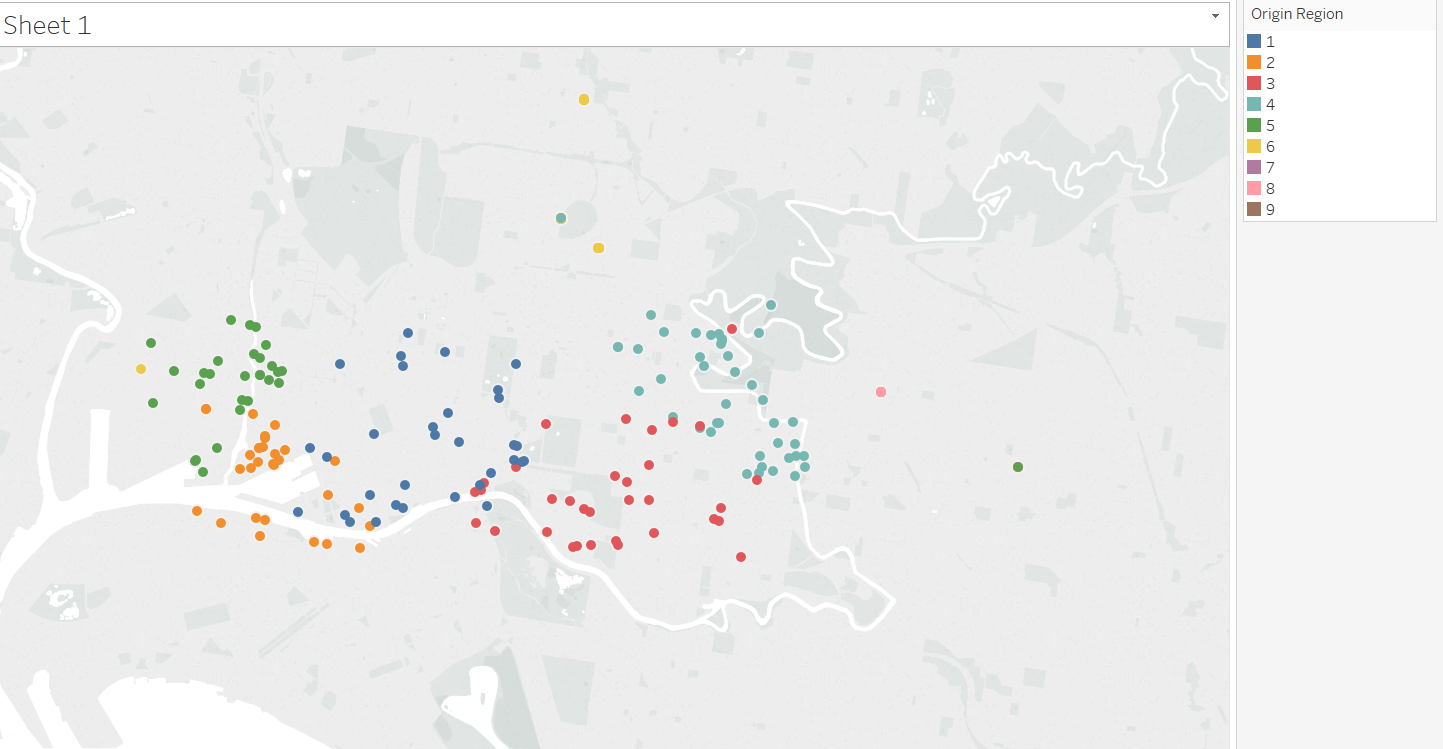

In [16]:
from IPython.display import Image
Image(filename = 'Origin Region.PNG', width = 1000, height = 1000)

To correct the values of Origin Region, I have plootted the location values on a map and changed the erroneous points manually.

## Correcting Origin Region 1

In [17]:
data_dirty['Origin Region'][data_dirty['UberID'] == 'ID1124019790'] = 1
data_dirty['Origin Region'][data_dirty['UberID'] == 'ID1531220184'] = 1
data_dirty['Origin Region'][data_dirty['UberID'] == 'ID1229854840'] = 1
data_dirty['Origin Region'][data_dirty['UberID'] == 'ID1775529103'] = 1

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shiiv\Anac

## Correcting Origin Region 3

In [18]:
data_dirty['Origin Region'][data_dirty['UberID'] == 'ID3360566454'] = 3

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Correcting Origin Region 6

In [19]:
data_dirty['Origin Region'][data_dirty['UberID'] == 'ID1471408918'] = 6

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Correcting Origin Region 8

In [20]:
data_dirty['Origin Region'][data_dirty['UberID'] == 'ID3157721032'] = 8

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Correcting Origin Region 4

In [21]:
data_dirty['Origin Region'][data_dirty['UberID'] == 'ID1509206932'] = 4
data_dirty['Origin Region'][data_dirty['UberID'] == 'ID3604242724'] = 4
data_dirty['Origin Region'][data_dirty['UberID'] == 'ID1509206932'] = 4

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Correcting Origin Region 5

In [22]:
data_dirty['Origin Region'][data_dirty['UberID'] == 'ID1774019647'] = 5
data_dirty['Origin Region'][data_dirty['UberID'] == 'ID1223802903'] = 5
data_dirty['Origin Region'][data_dirty['UberID'] == 'ID1669014479'] = 5

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Correcting Origin Region 2

In [23]:
data_dirty['Origin Region'][data_dirty['UberID'] == 'ID3983251859'] = 2
data_dirty['Origin Region'][data_dirty['UberID'] == 'ID1729437579'] = 2
data_dirty['Origin Region'][data_dirty['UberID'] == 'ID3890931257'] = 2
data_dirty['Origin Region'][data_dirty['UberID'] == 'ID1982047403'] = 2
data_dirty['Origin Region'][data_dirty['UberID'] == 'ID1931949637'] = 2
data_dirty['Origin Region'][data_dirty['UberID'] == 'ID1698394407'] = 2
data_dirty['Origin Region'][data_dirty['UberID'] == 'ID1466193196'] = 2
data_dirty['Origin Region'][data_dirty['UberID'] == 'ID1676339641'] = 2
data_dirty['Origin Region'][data_dirty['UberID'] == 'ID3419927466'] = 2

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shiiv\Anac

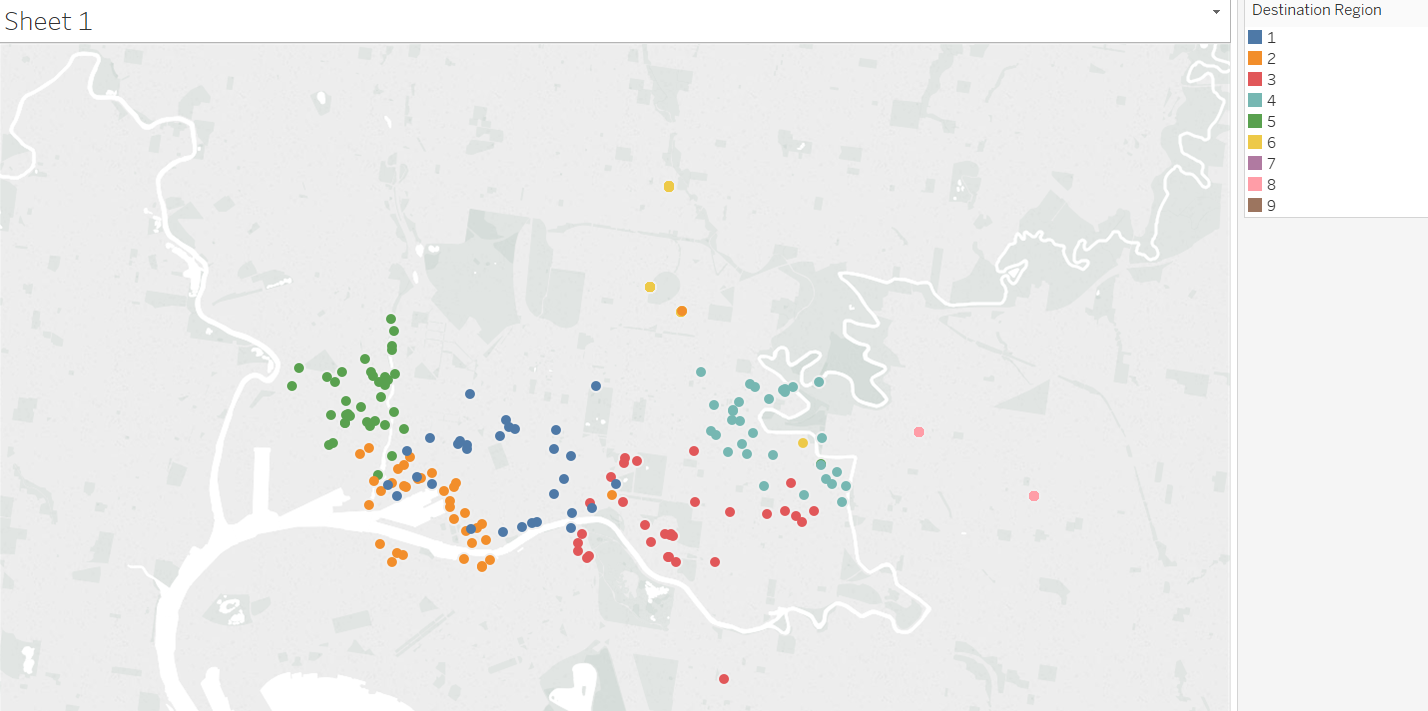

In [24]:
from IPython.display import Image
Image(filename = 'Destination Region.PNG', width = 1000, height = 1000)

Similar to Origin Region plot, I have plotted the Destination region points on a map and corrected the values manually, since computing the values changed a lot of regions and gave an undesired output.

## Correcting Destination Region 6

In [25]:
data_dirty['Destination Region'][data_dirty['UberID'] == 'ID1397385284'] = 6

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Correcting Destination Region 4

In [26]:
data_dirty['Destination Region'][data_dirty['UberID'] == 'ID1319524802'] = 4
data_dirty['Destination Region'][data_dirty['UberID'] == 'ID5282914313'] = 4
data_dirty['Destination Region'][data_dirty['UberID'] == 'ID1833964298'] = 4

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Correcting Destination Region 3

In [27]:
data_dirty['Destination Region'][data_dirty['UberID'] == 'ID1296668879'] = 3
data_dirty['Destination Region'][data_dirty['UberID'] == 'ID1268150686'] = 3
data_dirty['Destination Region'][data_dirty['UberID'] == 'ID1609353201'] = 3

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Correcting Destination Region 2

In [28]:
data_dirty['Destination Region'][data_dirty['UberID'] == 'ID1283799199'] = 2
data_dirty['Destination Region'][data_dirty['UberID'] == 'ID5813116376'] = 2
data_dirty['Destination Region'][data_dirty['UberID'] == 'ID1471408918'] = 2
data_dirty['Destination Region'][data_dirty['UberID'] == 'ID3156344222'] = 2
data_dirty['Destination Region'][data_dirty['UberID'] == 'ID1982123590'] = 2
data_dirty['Destination Region'][data_dirty['UberID'] == 'ID1484928118'] = 2

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shiiv\Anac

## Correcting Destination Region 5

In [29]:
data_dirty['Destination Region'][data_dirty['UberID'] == 'ID3604242724'] = 5
data_dirty['Destination Region'][data_dirty['UberID'] == 'ID3302933476'] = 5

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Column 5 : Origin Latitude

As the name suggets, it contains the latitude of the origin of the ride.

In [30]:
data_dirty['Origin Latitude'].describe()

count    296.000000
mean     -36.570800
std        9.774124
min      -38.110916
25%      -37.824652
50%      -37.815153
75%      -37.804987
max       38.110916
Name: Origin Latitude, dtype: float64

Hmm. It says the minimum value is **-38.110916** but the maximum value is **38.110916**. It can't be that there are both positive and negative latitudes as this data just **represents Victoria, Australia state** and nothing from outside of it. Now, since the **mean is -36.570800**, it tells us that there are way more negative latitudes than positive.

Let us now inspect the latitudes which are positive.

In [31]:
data_dirty[data_dirty['Origin Latitude'] > 0]

,UberID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
31,ID1366073223,0,9,1,38.110916,144.654173,-37.813519,144.965621,43551.0,2018-06-15,14:21:06,10464.42,17:15:30,24.28
33,ID3516439736,1,8,5,37.807202,145.026637,-37.802918,144.928123,9411.0,2018-04-28,12:30:11,2439.18,13:10:50,21.32
36,ID1632901508,0,5,1,37.804927,144.939491,-37.820057,144.958337,2714.0,2018-02-16,19:19:53,742.14,19:32:15,8.50
38,ID3447603359,1,2,4,37.815276,144.936649,-37.803140,144.995637,6040.0,2018-04-12,20:27:42,1523.64,20:53:05,14.34
39,ID5234461795,2,6,4,37.787442,144.980409,-37.805565,144.994444,3329.0,2018-06-23,10:22:33,829.98,10:36:22,77.63


5 rows is all we get. Definitely, this data is dirty as **these latitude point somewhere near Japan**!. However, if we just introduce a negative sign in front of it, say, we make 38.110916 as -38.110916, it perfectly falls in Victoria, Australia! Which is great news as we won't have to throw away these data points! And that's what we will do.

In [32]:
data_dirty['Origin Latitude'][data_dirty['Origin Latitude'] > 0] = -1 * data_dirty['Origin Latitude']

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Awesome, we have fixed the 5 rows which were incorrect!

## Column 6 : Origin Longitude

This is the longitude of the origin of the ride.

In [33]:
data_dirty['Origin Longitude'].describe()

count    296.000000
mean     144.932030
std        0.108663
min      144.654173
25%      144.927581
50%      144.965340
75%      144.993208
max      145.046450
Name: Origin Longitude, dtype: float64

Unlike it's latitude counterpart, **origin longitude seems fine as as it's min and max values are close and also consistent with the mean and hardly any standard deviation**!

## Column 7 : Destination Latitude

This is the latitude of the destination of the ride.

In [34]:
data_dirty['Destination Latitude'].describe()

count    296.000000
mean     -36.569292
std        9.765564
min      -38.110916
25%      -37.824056
50%      -37.814106
75%      -37.803672
max       37.811423
Name: Destination Latitude, dtype: float64

Here we go again, **same problem s the one with Origin Latitude**! Similarly as Origin Latitude, we will inspect the Destination Latitude which have **positive values**. 

In [35]:
data_dirty[data_dirty['Destination Latitude'] > 0]

,UberID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
42,ID1796576328,0,6,1,-37.773845,144.983689,37.806500,144.956090,5357.0,2018-05-21,04:43:15,1099.62,5:01:34,10.65
44,ID3699819483,1,1,6,-37.822112,144.953601,37.773803,144.983647,9764.0,2018-05-26,15:37:09,2956.08,16:26:25,26.62
46,ID1916274795,0,8,1,-37.807202,145.026637,37.809532,144.949007,7590.0,2018-03-12,07:45:44,1926.60,8:17:50,6.00
50,ID3475809456,1,7,1,-37.861835,144.905716,37.806798,144.957122,9268.0,2018-02-05,12:58:32,3118.50,13:50:30,22.40
53,ID1538829322,0,5,3,-37.808147,144.934247,37.811423,144.976012,4322.0,2018-05-23,03:59:11,1036.08,4:16:27,11.86


5 rows again! It's as if this data was engineered. We will just reverse the signs and this should make sense too.

In [36]:
data_dirty['Destination Latitude'][data_dirty['Destination Latitude'] > 0] = -1 * data_dirty['Destination Latitude']

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


All the 5 rows are now fixed.

## Column 8 : Destination Longitude

This is the longitude of the destination of the ride.

In [37]:
data_dirty['Destination Longitude'].describe()

count    296.000000
mean     144.932510
std        0.105538
min      144.654173
25%      144.928131
50%      144.955834
75%      144.986389
max      145.046450
Name: Destination Longitude, dtype: float64

Same as Origin Longitude, min and max are fine, standard deviation is negligible and mean looks okay too.

## Column 9 : Journey Distance(m)

This is the total distance travelled by the cab, starting and ending at a given point.

In [38]:
data_dirty['Journey Distance(m)'].describe()

count      296.000000
mean     16243.294257
std      16889.336644
min       1150.000000
25%       5015.500000
50%       8497.600000
75%      15151.000000
max      51061.000000
Name: Journey Distance(m), dtype: float64

Looking at the Journey Distance column, we see that the **average distance** per ride is about **16.3 km** and the **minimum** and **maximum distance** is **1150 m** and **51061 m** respectively. 51 km seems like somewhere on the outskirts of Melbourne. Could this be a wrong value? Only one way to find out. We will be calculating our own distances to verify.

But before that, we need to import the **nodes.csv** file which contains the nodes for **each latitude** and **longitude**. We will have to merge the nodes file with the dirty data based on **Origin Latitude, Origin Longitude, Destination Latitude and Destination Longitude** to get the **starting** and **ending** nodes.

We will rename the first column of the nodes file to 'Node' to avoid any confusion while joining.

In [39]:
nodes = pd.read_csv('nodes.csv')
nodes.columns = ['Node', 'lat', 'lon']

In [40]:
data_dirty_nodes_origin = pd.merge(data_dirty, nodes, how = 'left', left_on = ['Origin Latitude', 'Origin Longitude'], right_on = ['lat', 'lon'])
data_dirty_nodes_origin_destination = pd.merge(data_dirty_nodes_origin, nodes, how = 'left', left_on = ['Destination Latitude', 'Destination Longitude'], right_on = ['lat', 'lon'])

data_dirty_nodes_origin_destination.head()

,UberID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Node_x,lat_x,lon_x,Node_y,lat_y,lon_y
0,ID5230402179,2,2,7,-37.822570,144.952745,-37.861835,144.905716,8478.2,2018-01-02,03:17:35,2885.10,4:05:40,230.62,591358996,-37.822570,144.952745,1390575046,-37.861835,144.905716
1,ID1677847535,0,7,6,-37.861835,144.905716,-37.773803,144.983647,16036.1,2018-07-07,01:53:07,5320.68,3:21:47,23.52,1390575046,-37.861835,144.905716,2455254505,-37.773803,144.983647
2,ID3457854587,1,4,1,-37.802078,144.988562,-37.815655,144.963956,3312.7,2018-01-10,00:16:13,861.24,0:30:34,18.87,227324361,-37.802078,144.988562,6167441069,-37.815655,144.963956
3,ID3328177715,1,3,4,-37.824991,144.982047,-37.808765,144.996189,2852.0,2018-04-20,01:51:33,678.54,2:02:51,19.72,3293340292,-37.824991,144.982047,355819035,-37.808765,144.996189
4,ID1261900839,0,9,6,-38.110916,144.654173,-37.787442,144.980409,47035.0,2018-03-28,06:07:21,11413.02,9:17:34,21.36,5002706670,-38.110916,144.654173,2204638268,-37.787442,144.980409


Great! We have both the starting and ending nodes in the 'Node_x' and 'Node_y' columns respectively. Now we can build our graph using the **Djikstra's algorithm** and thus, calculate the distance. To make the graph, we need the **edges.csv** file.

In [41]:
edges = pd.read_csv('edges.csv')

In [42]:
Graph = nx.from_pandas_edgelist(edges, 'u', 'v', ['distance(m)'])

Now, we have a graph in the **Graph** object. Let's put Djikstra's algorithm to good use and calculate the distance between and given **souce** and **target** node. 

As an **example**, below, we have a hard-coded source and target and we are printing out the **Shortest distance** and **path**.

In [43]:
eg_src = 3293340292
eg_tgt = 355819035

eg_d, eg_p = nx.single_source_dijkstra(Graph, source = eg_src, target = eg_tgt, weight = 'distance(m)')
print("Shortest distance: ", eg_d)
print("Paths: ", eg_p)

Shortest distance:  2852.0
Paths:  [3293340292, 3293340262.0, 5727168124.0, 5727168125.0, 3293340273.0, 5727168144.0, 5727168126.0, 3293340291.0, 5727168127.0, 3293340264.0, 3293342994.0, 3293342993.0, 3293343015.0, 3293340276.0, 3293340280.0, 575561666.0, 746924351.0, 746924352.0, 746922230.0, 746921984.0, 746922193.0, 2347007256.0, 3268156337.0, 3268156354.0, 2347234664.0, 582798986.0, 582798975.0, 582798958.0, 575518666.0, 575520122.0, 54550902.0, 4583419070.0, 2632208067.0, 1449308614.0, 1449308562.0, 1449308548.0, 60095900.0, 1449308555.0, 307349700.0, 3144850937.0, 241807189.0, 643985980.0, 370750441.0, 241807186.0, 241807182.0, 681284972.0, 681284986.0, 241807180.0, 660546021.0, 660546024.0, 1713449453.0, 1713449452.0, 356083796.0, 356083726.0, 170216835.0, 4061053448.0, 4061053460.0, 4061053461.0, 4061053456.0, 129953605.0, 2236727821.0, 2236727849.0, 4283908153.0, 355819026.0, 355819035.0]


Cool! The function is returning the shortest distance and path between two nodes. We shall now loop this over to all the nodes and find the journey distance.

Below, we have looped over each element of the dataframe **data_dirty_nodes_origin_destination** and accessed it's **Node_X** and **Node_y** values which are the starting and ending nodes of a ride respectively. Then, we have applied the Djiktra's algorithm to find the shortest distance and path. We have stored the distance as a list in the **dist** list. 

In [44]:
dist = []
for ind in data_dirty_nodes_origin_destination.index:
    src = data_dirty_nodes_origin_destination['Node_x'][ind] 
    tgt = data_dirty_nodes_origin_destination['Node_y'][ind]
    d, p = nx.single_source_dijkstra(Graph, source = src, target = tgt, weight = 'distance(m)')
    dist.append(d)

To merge with our original dataframe **data_dirty**, we must convert **dist** to a dataframe as well. And then we can merge the two and then **drop** the **Journey Distance(m)** column.

In [45]:
dist_df = pd.DataFrame(dist)
dist_df.columns = ['Computed Journey Distance(m)']

All the computed distance values are now in a dataframe! We can now **column bind** the dist_df dataframe to our data_dirty dataframe.

In [46]:
data_dirty = pd.concat([data_dirty.reset_index(drop = True), dist_df], axis = 1)

Computed Journey Distance(m) is now binded with our original dataframe.

In [47]:
data_dirty['Distance Difference(m)'] = data_dirty['Journey Distance(m)'] - data_dirty['Computed Journey Distance(m)']
data_dirty[['Journey Distance(m)', 'Computed Journey Distance(m)', 'Distance Difference(m)']][(data_dirty['Distance Difference(m)'] > 0) | (data_dirty['Distance Difference(m)'] < 0)]

,Journey Distance(m),Computed Journey Distance(m),Distance Difference(m)
0,8478.2,8472.0,6.2
1,16036.1,16033.0,3.1
2,3312.7,3307.0,5.7
6,6557.4,6550.0,7.4
7,45056.7,45048.0,8.7


Here we can clearly see that there are only 5 rows where the Journey Distance(m) differs from the Computed Journey Distance(m). 

## Column 10 : Departure Date

This is the date of the ride.

In [48]:
data_dirty['Departure Date'].describe()

count            296
unique           155
top       2018-06-12
freq               5
Name: Departure Date, dtype: object

So, we have the datein the **YYYY-MM-DD** format. Knowing that this format is being followed across all the rows, we can iterate over all rows and check for **anomalies** like, for example **month being greater than 12** or the **month and day being interchanged** etc.

In [49]:
for i in data_dirty.index:
     
    if(int(data_dirty['Departure Date'][i][5:7]) > 12):
        print(str(data_dirty['UberID'][i]) + " : " + str(data_dirty['Departure Date'][i]))

ID1416108530 : 2018-23-03
ID1777863282 : 2018-28-03
ID3482559315 : 2018-21-03
ID1509713398 : 2018-13-05


Ahaan! We were rightly suspicious about the **month** and **day** being interchanged. We know that the data is having the **YYYY-MM-DD** format and **23, 28, 21 and 13 cannot be months** in the **4 rows** which seem to have this problem.

We can access these elements individually based on their **UberID's** and changed it to our desired format.

In [50]:
data_dirty['Departure Date'][data_dirty['UberID'] == 'ID1416108530'] = '2018-03-23'
data_dirty['Departure Date'][data_dirty['UberID'] == 'ID1777863282'] = '2018-03-28'
data_dirty['Departure Date'][data_dirty['UberID'] == 'ID3482559315'] = '2018-03-21'
data_dirty['Departure Date'][data_dirty['UberID'] == 'ID1509713398'] = '2018-05-13'

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shiiv\Anac

In [51]:
print(data_dirty['Departure Date'][data_dirty['UberID'] == 'ID1416108530'])
print(data_dirty['Departure Date'][data_dirty['UberID'] == 'ID1777863282'])
print(data_dirty['Departure Date'][data_dirty['UberID'] == 'ID3482559315'])
print(data_dirty['Departure Date'][data_dirty['UberID'] == 'ID1509713398'])

194    2018-03-23
Name: Departure Date, dtype: object
201    2018-03-28
Name: Departure Date, dtype: object
204    2018-03-21
Name: Departure Date, dtype: object
214    2018-05-13
Name: Departure Date, dtype: object


Upon inspection, we can see that atleast this type of problem has been handled. Now we can further explore the Departure Date for any other kind of errors. One common error could be the month of **February having more than 27 or 28 (during a leap year) days**.  

In [52]:
for i in data_dirty.index:
     
    if(int(data_dirty['Departure Date'][i][5:7]) == 2) & (int(data_dirty['Departure Date'][i][8:10]) > 27):
        print(str(data_dirty['UberID'][i]) + " : " + str(data_dirty['Departure Date'][i]))

ID3321893808 : 2018-02-30
ID5175912927 : 2018-02-30
ID1157437614 : 2018-02-30
ID3234329706 : 2018-02-30
ID3411669172 : 2018-02-30


Bingo! Just as we suspected, there are **5 rows** with the month of February having days greater than 27 or 28 and all of them have days as 30. Clearly, we need to **change the day back to 27** as **2018 is not a leap year**. As 2018 is not a leap year, we shall change the date to Feb 27, 2018.

In [53]:
data_dirty['Departure Date'][data_dirty['UberID'] == 'ID3321893808'] = '2018-02-27'
data_dirty['Departure Date'][data_dirty['UberID'] == 'ID5175912927'] = '2018-02-27'
data_dirty['Departure Date'][data_dirty['UberID'] == 'ID1157437614'] = '2018-02-27'
data_dirty['Departure Date'][data_dirty['UberID'] == 'ID3234329706'] = '2018-02-27'
data_dirty['Departure Date'][data_dirty['UberID'] == 'ID3411669172'] = '2018-02-27'

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shiiv\Anac

In [54]:
print(data_dirty['Departure Date'][data_dirty['UberID'] == 'ID3321893808'])
print(data_dirty['Departure Date'][data_dirty['UberID'] == 'ID5175912927'])
print(data_dirty['Departure Date'][data_dirty['UberID'] == 'ID1157437614'])
print(data_dirty['Departure Date'][data_dirty['UberID'] == 'ID3234329706'])
print(data_dirty['Departure Date'][data_dirty['UberID'] == 'ID3411669172'])

228    2018-02-27
Name: Departure Date, dtype: object
230    2018-02-27
Name: Departure Date, dtype: object
236    2018-02-27
Name: Departure Date, dtype: object
244    2018-02-27
Name: Departure Date, dtype: object
247    2018-02-27
Name: Departure Date, dtype: object


This is taken care of as well. But do other months have similar problems as well? Especially the months of **April, June, September** and **November** where there are **31 days** instead **30 days**.

Let us check for April first.

In [55]:
for i in data_dirty.index:
     
    if(int(data_dirty['Departure Date'][i][5:7]) == 4) & (int(data_dirty['Departure Date'][i][8:10]) > 30):
        print(str(data_dirty['UberID'][i]) + " : " + str(data_dirty['Departure Date'][i]))

ID3826606608 : 2018-04-31
ID5404352681 : 2018-04-31
ID1520648596 : 2018-04-31
ID3257294060 : 2018-04-31


Month of **April** is also having incorrect values as we can see as April only has **30 days** in it. We can fix it in a similar way as we did with the month of February.

In [56]:
data_dirty['Departure Date'][data_dirty['UberID'] == 'ID3826606608'] = '2018-04-30'
data_dirty['Departure Date'][data_dirty['UberID'] == 'ID5404352681'] = '2018-04-30'
data_dirty['Departure Date'][data_dirty['UberID'] == 'ID1520648596'] = '2018-04-30'
data_dirty['Departure Date'][data_dirty['UberID'] == 'ID3257294060'] = '2018-04-30'

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shiiv\Anac

In [57]:
print(data_dirty['Departure Date'][data_dirty['UberID'] == 'ID3826606608'])
print(data_dirty['Departure Date'][data_dirty['UberID'] == 'ID5404352681'])
print(data_dirty['Departure Date'][data_dirty['UberID'] == 'ID1520648596'])
print(data_dirty['Departure Date'][data_dirty['UberID'] == 'ID3257294060'])

224    2018-04-30
Name: Departure Date, dtype: object
231    2018-04-30
Name: Departure Date, dtype: object
243    2018-04-30
Name: Departure Date, dtype: object
245    2018-04-30
Name: Departure Date, dtype: object


Fixed it! April now has only **30 days**! Moving on to June now.

In [58]:
for i in data_dirty.index:
     
    if(int(data_dirty['Departure Date'][i][5:7]) == 6) & (int(data_dirty['Departure Date'][i][8:10]) > 30):
        print(str(data_dirty['UberID'][i]) + " : " + str(data_dirty['Departure Date'][i]))

ID1214177228 : 2018-06-31


Just one value! But this will still be considered as **dirty** and needs to go, just like the other **invalid dates**.

In [59]:
data_dirty['Departure Date'][data_dirty['UberID'] == 'ID1214177228'] = '2018-06-30'
print(data_dirty['Departure Date'][data_dirty['UberID'] == 'ID1214177228'])

232    2018-06-30
Name: Departure Date, dtype: object


C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


**June** is done and dusted! Moving on to **September** and **November**.

In [60]:
for i in data_dirty.index:
     
    if(int(data_dirty['Departure Date'][i][5:7]) == 9) & (int(data_dirty['Departure Date'][i][8:10]) > 30):
        print(str(data_dirty['UberID'][i]) + " : " + str(data_dirty['Departure Date'][i]))

In [61]:
for i in data_dirty.index:
     
    if(int(data_dirty['Departure Date'][i][5:7]) == 11) & (int(data_dirty['Departure Date'][i][8:10]) > 30):
        print(str(data_dirty['UberID'][i]) + " : " + str(data_dirty['Departure Date'][i]))

**No results for September and Novermber**. Looks like this column has been cleaned entirely, can't really think of any other type of errors.

## Column 11 : Departure Time

This is the departure time of the cab at the origin.

Let's inspect both the columns to understand them better.

In [62]:
data_dirty['Departure Time'].head()

0    03:17:35
1    01:53:07
2    00:16:13
3    01:51:33
4    06:07:21
Name: Departure Time, dtype: object

We know for a fact that there are **no errors** in the **Departure Time** column as if there were, then there was no way for us to fix both Arrival Time and Departure Time simultaneously. Also, we know that **there are no more than one error in every row** and there can't be an error in both the columns at once.

In [63]:
data_dirty['Arrival Time'].head()

0    4:05:40
1    3:21:47
2    0:30:34
3    2:02:51
4    9:17:34
Name: Arrival Time, dtype: object

In [64]:
data_dirty.head()

,UberID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Computed Journey Distance(m),Distance Difference(m)
0,ID5230402179,2,2,7,-37.822570,144.952745,-37.861835,144.905716,8478.2,2018-01-02,03:17:35,2885.10,4:05:40,230.62,8472.0,6.2
1,ID1677847535,0,7,6,-37.861835,144.905716,-37.773803,144.983647,16036.1,2018-07-07,01:53:07,5320.68,3:21:47,23.52,16033.0,3.1
2,ID3457854587,1,4,1,-37.802078,144.988562,-37.815655,144.963956,3312.7,2018-01-10,00:16:13,861.24,0:30:34,18.87,3307.0,5.7
3,ID3328177715,1,3,4,-37.824991,144.982047,-37.808765,144.996189,2852.0,2018-04-20,01:51:33,678.54,2:02:51,19.72,2852.0,0.0
4,ID1261900839,0,9,6,-38.110916,144.654173,-37.787442,144.980409,47035.0,2018-03-28,06:07:21,11413.02,9:17:34,21.36,47035.0,0.0


## Column 13 : Travel Time(s)

The amount of time in seconds the ride takes to complete.

In [65]:
data_dirty['Travel Time(s)'].describe()

count      296.000000
mean      4203.461959
std       4073.849447
min        271.380000
25%       1301.520000
50%       2478.480000
75%       4911.600000
max      13204.980000
Name: Travel Time(s), dtype: float64

Interesting, there have been Uber rides ranging from as high as **3.7 hours** to as little as **4.5 minutes**. We shall now make use of the **traveltime** function given to us. This function will return the calculated, accurate travel time in seconds.

In [66]:
def traveltime(path, edges):

    tt = 0
    for i in range(len(path) - 1):
        tt = tt + (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['distance(m)'].values[0] * 1.0 * 3600) / (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['speed(km/h)'].values[0] * 1000)
    return tt

Similar to how we computed **Journey Distance(m)**, we will compute the **travel time(s)** by defining an empty list. By running a for loop over the starting and ending nodes and passing them in the Djikstra'algorithm function to get the **list of paths** and that is then, passed into the **traveltime** function along with the **edges** dataframe to return the **corrected travel time**. 

This corrected travel time is then appended in the **time** list everytime the loop is run. Thus, we end up getting the desired travel time.

In [67]:
time = []
for ind in data_dirty_nodes_origin_destination.index:
    src = data_dirty_nodes_origin_destination['Node_x'][ind] 
    tgt = data_dirty_nodes_origin_destination['Node_y'][ind]
    d, p = nx.single_source_dijkstra(Graph, source = src, target = tgt, weight = 'distance(m)')
    time.append(traveltime(p, edges))

In [68]:
time_df = pd.DataFrame(time)
time_df.columns = ['Computed Travel Time(s)']
time_df.head()

,Computed Travel Time(s)
0,2885.10
1,5320.68
2,861.24
3,678.54
4,11413.26


Let's now concatenate the **data_dirty** dataframe with our computed travel time(s) **time_df** dataframe so that we can clearly find the difference. 

In [69]:
data_dirty = pd.concat([data_dirty.reset_index(drop = True), time_df], axis = 1)

In [70]:
data_dirty['Time Difference(s)'] = data_dirty['Travel Time(s)'] - data_dirty['Computed Travel Time(s)']
data_dirty[['Travel Time(s)', 'Computed Travel Time(s)', 'Time Difference(s)']][(data_dirty['Time Difference(s)'] > 0.01) | (data_dirty['Time Difference(s)'] < -0.01)]

,Travel Time(s),Computed Travel Time(s),Time Difference(s)
4,11413.02,11413.26,-0.24
7,10941.48,10968.42,-26.94
58,11584.80,11588.88,-4.08
59,1538.70,1547.70,-9.00
60,1647.60,1572.60,75.00
62,2356.38,2302.38,54.00
68,12119.78,12069.78,50.00
73,10591.16,10568.16,23.00
74,1279.96,1287.96,-8.00
75,1001.64,905.64,96.00


There are **28 rows** where the Travel Time(s) differs significantly from the Computed Time Travel(s).  

In [71]:
data_dirty['Journey Distance(m)'] = data_dirty['Computed Journey Distance(m)']
data_dirty.head()

,UberID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Computed Journey Distance(m),Distance Difference(m),Computed Travel Time(s),Time Difference(s)
0,ID5230402179,2,2,7,-37.822570,144.952745,-37.861835,144.905716,8472.0,2018-01-02,03:17:35,2885.10,4:05:40,230.62,8472.0,6.2,2885.10,0.000000e+00
1,ID1677847535,0,7,6,-37.861835,144.905716,-37.773803,144.983647,16033.0,2018-07-07,01:53:07,5320.68,3:21:47,23.52,16033.0,3.1,5320.68,0.000000e+00
2,ID3457854587,1,4,1,-37.802078,144.988562,-37.815655,144.963956,3307.0,2018-01-10,00:16:13,861.24,0:30:34,18.87,3307.0,5.7,861.24,0.000000e+00
3,ID3328177715,1,3,4,-37.824991,144.982047,-37.808765,144.996189,2852.0,2018-04-20,01:51:33,678.54,2:02:51,19.72,2852.0,0.0,678.54,1.136868e-13
4,ID1261900839,0,9,6,-38.110916,144.654173,-37.787442,144.980409,47035.0,2018-03-28,06:07:21,11413.02,9:17:34,21.36,47035.0,0.0,11413.26,-2.400000e-01


In [72]:
data_dirty['Travel Time(s)'] = data_dirty['Computed Travel Time(s)']
data_dirty.head(n = 10)

,UberID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Computed Journey Distance(m),Distance Difference(m),Computed Travel Time(s),Time Difference(s)
0,ID5230402179,2,2,7,-37.822570,144.952745,-37.861835,144.905716,8472.0,2018-01-02,03:17:35,2885.10,4:05:40,230.62,8472.0,6.2,2885.10,0.000000e+00
1,ID1677847535,0,7,6,-37.861835,144.905716,-37.773803,144.983647,16033.0,2018-07-07,01:53:07,5320.68,3:21:47,23.52,16033.0,3.1,5320.68,0.000000e+00
2,ID3457854587,1,4,1,-37.802078,144.988562,-37.815655,144.963956,3307.0,2018-01-10,00:16:13,861.24,0:30:34,18.87,3307.0,5.7,861.24,0.000000e+00
3,ID3328177715,1,3,4,-37.824991,144.982047,-37.808765,144.996189,2852.0,2018-04-20,01:51:33,678.54,2:02:51,19.72,2852.0,0.0,678.54,1.136868e-13
4,ID1261900839,0,9,6,-38.110916,144.654173,-37.787442,144.980409,47035.0,2018-03-28,06:07:21,11413.26,9:17:34,21.36,47035.0,0.0,11413.26,-2.400000e-01
5,ID1647762302,0,5,6,-37.804863,144.924435,-37.773803,144.983647,10841.0,2018-01-07,02:53:47,3266.40,3:48:13,18.59,10841.0,0.0,3266.40,0.000000e+00
6,ID3481693880,1,3,6,-37.824790,144.982697,-37.773845,144.983689,6550.0,2018-02-18,22:55:14,1426.56,23:19:00,25.04,6550.0,7.4,1426.56,0.000000e+00
7,ID1519595245,0,9,1,-38.110916,144.654173,-37.800878,144.971157,45048.0,2018-05-27,02:58:18,10968.42,6:00:39,31.17,45048.0,8.7,10968.42,-2.694000e+01
8,ID1213707077,0,4,8,-37.806425,145.008036,-37.807202,145.026637,1829.0,2018-04-11,07:26:52,455.40,7:34:27,1.29,1829.0,0.0,455.40,0.000000e+00
9,ID1504215632,0,4,9,-37.802362,144.991536,-38.110916,144.654173,46929.0,2018-05-10,02:20:37,11357.52,5:29:54,27.46,46929.0,0.0,11357.52,1.818989e-12


In [73]:
data_dirty = data_dirty.drop(['Computed Journey Distance(m)', 'Distance Difference(m)','Computed Travel Time(s)', 'Time Difference(s)'], axis = 1)
data_dirty.head()

,UberID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID5230402179,2,2,7,-37.822570,144.952745,-37.861835,144.905716,8472.0,2018-01-02,03:17:35,2885.10,4:05:40,230.62
1,ID1677847535,0,7,6,-37.861835,144.905716,-37.773803,144.983647,16033.0,2018-07-07,01:53:07,5320.68,3:21:47,23.52
2,ID3457854587,1,4,1,-37.802078,144.988562,-37.815655,144.963956,3307.0,2018-01-10,00:16:13,861.24,0:30:34,18.87
3,ID3328177715,1,3,4,-37.824991,144.982047,-37.808765,144.996189,2852.0,2018-04-20,01:51:33,678.54,2:02:51,19.72
4,ID1261900839,0,9,6,-38.110916,144.654173,-37.787442,144.980409,47035.0,2018-03-28,06:07:21,11413.26,9:17:34,21.36


## Column 12 : Arrival Time

This column gives us the time the cab arrived at the Destination.

In [74]:
data_dirty.head()

,UberID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID5230402179,2,2,7,-37.822570,144.952745,-37.861835,144.905716,8472.0,2018-01-02,03:17:35,2885.10,4:05:40,230.62
1,ID1677847535,0,7,6,-37.861835,144.905716,-37.773803,144.983647,16033.0,2018-07-07,01:53:07,5320.68,3:21:47,23.52
2,ID3457854587,1,4,1,-37.802078,144.988562,-37.815655,144.963956,3307.0,2018-01-10,00:16:13,861.24,0:30:34,18.87
3,ID3328177715,1,3,4,-37.824991,144.982047,-37.808765,144.996189,2852.0,2018-04-20,01:51:33,678.54,2:02:51,19.72
4,ID1261900839,0,9,6,-38.110916,144.654173,-37.787442,144.980409,47035.0,2018-03-28,06:07:21,11413.26,9:17:34,21.36


Using the **datetime** library, we can add the **corrected Travel Time(s)** with the **Departure Time** to get the **correct Arrival Time**.

In [75]:
import datetime as dt

for i in data_dirty.index:
    time1ele = data_dirty['Departure Time'][i].split(":")
    data_dirty['Arrival Time'][i] =  (dt.datetime.combine(dt.date(1,1,1),dt.time(int(time1ele[0]),int(time1ele[1]),int(time1ele[2]))) + dt.timedelta(seconds=int(data_dirty['Travel Time(s)'][i]))).time()

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [76]:
data_dirty.head()

,UberID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID5230402179,2,2,7,-37.822570,144.952745,-37.861835,144.905716,8472.0,2018-01-02,03:17:35,2885.10,04:05:40,230.62
1,ID1677847535,0,7,6,-37.861835,144.905716,-37.773803,144.983647,16033.0,2018-07-07,01:53:07,5320.68,03:21:47,23.52
2,ID3457854587,1,4,1,-37.802078,144.988562,-37.815655,144.963956,3307.0,2018-01-10,00:16:13,861.24,00:30:34,18.87
3,ID3328177715,1,3,4,-37.824991,144.982047,-37.808765,144.996189,2852.0,2018-04-20,01:51:33,678.54,02:02:51,19.72
4,ID1261900839,0,9,6,-38.110916,144.654173,-37.787442,144.980409,47035.0,2018-03-28,06:07:21,11413.26,09:17:34,21.36


Everything looks fine now after dropping uneccessary columns. We will now export it as our solution file.

In [77]:
data_dirty.to_csv('30046572_data_dirty_solution.csv', index = False)

## Task 2 - Fixing Missing Values

Poor research methods or inefficient data measuring systems lead to missing values, which essentially means that there is **no data** recorded for that particular attribute. Missing values can lead to **biased results**, **incomplete analysis** and sometimes the data is missing to such an extent that it is rendered useless.

We are given the Uber ridesharing data which has some missing values. Our goal is to build a Linear Regression predictive model to estimate the target variable(s) and thus, impute the missing values. 

## Importing Libraries

- importing **pandas** for powerful **data manipulation** and **reading**.
- importing **numpy** for computing complex mathematical expressions with ease.
- importing **datetime** to compute date and time related operations.
- importing **calendar** to compute day, month, year related operations.
- importing **re** to manipulate strings using **Regular Expressions**.
- import **seaborn** for **Data Visualization**.
- importing **LinearRegression** from **sklearn.linear_model** to perform **Linear Regression**.
- importing **train_test_split** from **sklearn.model_selection** for **Cross-Validation**.

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import calendar
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Let's start exploring our dataset to find which columns have missing values and how we can fix them.

## Importing Missing Values Data

We will be making use of panda's **read_csv** method to import our data. We can then use the **info** method to look at an overall perspective of the dataset.

In [79]:
data_missing = pd.read_csv('30046572_missing_value.csv')
data_dirty = pd.read_csv('30046572_data_dirty_solution.csv')
data_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 14 columns):
Unnamed: 0               98 non-null object
Uber Type                77 non-null float64
Origin Region            98 non-null int64
Destination Region       98 non-null int64
Origin Latitude          98 non-null float64
Origin Longitude         98 non-null float64
Destination Latitude     98 non-null float64
Destination Longitude    98 non-null float64
Journey Distance(m)      98 non-null int64
Departure Date           98 non-null object
Departure Time           98 non-null object
Travel Time(s)           98 non-null float64
Arrival Time             98 non-null object
Fare$                    79 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 10.8+ KB


In [80]:
data_missing.columns = ['UberID', 'Uber Type', 'Origin Region', 'Destination Region',
       'Origin Latitude', 'Origin Longitude', 'Destination Latitude',
       'Destination Longitude', 'Journey Distance(m)', 'Departure Date',
       'Departure Time', 'Travel Time(s)', 'Arrival Time', 'Fare$']

In [81]:
data_missing.head()

,UberID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID1282360365,0.0,6,1,-37.773803,144.983647,-37.806188,144.944348,9060,5/26/2018,17:01:36,2808.72,17:48:24,16.23
1,ID3370237539,1.0,4,2,-37.803109,145.003454,-37.815175,144.927539,8513,3/19/2018,5:58:42,2188.86,6:35:10,23.56
2,ID3245608941,NaN,9,7,-38.110916,144.654173,-37.861835,144.905716,50797,5/20/2018,9:55:59,13204.98,13:36:03,69.20
3,ID5513355678,NaN,2,7,-37.813594,144.937422,-37.861835,144.905716,10509,5/25/2018,0:57:53,3424.44,1:54:57,270.29
4,ID3275882509,1.0,6,9,-37.787442,144.980409,-38.110916,144.654173,47035,2/2/2018,7:05:21,11407.86,10:15:28,58.69


Immediately we notice that **Uber Type** and the **Fare** columns have **21** and **19 missing values respectively!** The rest of the attributes seem fine. Let us now explore the **Uber Type** attribute to see if we can fond any patterns in it.

In [82]:
data_missing['Uber Type'].unique()

array([ 0.,  1., nan,  2.])

Hmm, the Uber Type data has only 3 levels of data that is, **0, 1 or 2**. The missing values are represented as **NAN**. Time to explore Uber Type with other variables to see if we can find a pattern! We will begin with the ID column.

In [83]:
data_missing[['UberID', 'Uber Type']][data_missing['UberID'].str[2] == str(1)].head(n = 10)

,UberID,Uber Type
0,ID1282360365,0.0
5,ID1962944997,NaN
6,ID1861665934,0.0
7,ID1729057665,NaN
8,ID1672958107,0.0
11,ID1165702634,0.0
13,ID1373832741,NaN
15,ID1750270401,0.0
16,ID1705887610,0.0
18,ID1151547847,0.0


Whoa! We can notice a remarkable pattern here, **when the ID starts with 1, then the Uber Type is always 0**. Could this follow for the other Uber Types as well?

In [84]:
data_missing[['UberID', 'Uber Type']][data_missing['UberID'].str[2] == str(3)].head(n = 10)

,UberID,Uber Type
1,ID3370237539,1.0
2,ID3245608941,NaN
4,ID3275882509,1.0
9,ID3797150694,1.0
10,ID3878028584,NaN
12,ID3435646273,NaN
14,ID3552142464,1.0
17,ID3802065288,1.0
19,ID3441875860,NaN
21,ID3299644839,1.0


In [85]:
data_missing[['UberID', 'Uber Type']][data_missing['UberID'].str[2] == str(5)].head(n = 10)

,UberID,Uber Type
3,ID5513355678,NaN
29,ID5478230986,NaN
52,ID5804811679,2.0
54,ID5958257158,2.0
86,ID5957251289,2.0


Voila! Definitely a pattern here, maybe more. So, as a ground rule here, **if the ID starts with 1, then Uber Type is 0, if it starts with 3, then Uber Type is 1 and if it starts with 5, the Uber Type is 2**. Let us quickly impute those values.

## Imputing Uber Type

In [86]:
data_missing['Uber Type'][(data_missing['UberID'].str[2] == str(1))] = 0
data_missing['Uber Type'][(data_missing['UberID'].str[2] == str(3))] = 1
data_missing['Uber Type'][(data_missing['UberID'].str[2] == str(5))] = 2

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [87]:
data_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 14 columns):
UberID                   98 non-null object
Uber Type                98 non-null float64
Origin Region            98 non-null int64
Destination Region       98 non-null int64
Origin Latitude          98 non-null float64
Origin Longitude         98 non-null float64
Destination Latitude     98 non-null float64
Destination Longitude    98 non-null float64
Journey Distance(m)      98 non-null int64
Departure Date           98 non-null object
Departure Time           98 non-null object
Travel Time(s)           98 non-null float64
Arrival Time             98 non-null object
Fare$                    79 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 10.8+ KB


Amazing! No null values in the Uber Type column now, we have imputed it correctly.

We have fixed the Uber Type, we shall now export this file so that we can use it for the **missing data task**.

In [88]:
data_missing.to_csv('30046572_missing_data_uber_type_imputed.csv', index = False)

## Predicting Fare Using Linear Regression

In order to start designing our prediction approach, we need to see how much data do we have at our disposal and then we can start thinking about proceeding further.

Since there are only **79 rows** in our **missing values** dataset, we **cannot** use this as our **training data**. Hence, we will be making use of our **cleaned** dirty data solution as a training set. But currently, it is not in the format we want it to be, and thus, it needs to be **transformed**.

## Tranforming Dirty Data Template

The date format in data_dirty dataframe needs to be the same as that in data_missing, for the simple reason that we have to figure out **whether a given date falls on a weekend or a weekday**. The below loop will take individual **Departure Date** in the data_dirty dataframe and change it's format to that of **Departure Data** in **data_missing** dataframe.

In [89]:
data_dirty['Departure Date'][0]

'2018-01-02'

In short, the date format in data_dirty is getting changed from **%Y-%m-%d** to **%m/%d/%Y**.

In [90]:
for i in range(0, len(data_dirty)):
    data_dirty['Departure Date'][i] = datetime.datetime.strptime(data_dirty['Departure Date'][i], '%Y-%m-%d').strftime('%m/%d/%Y')

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [91]:
data_dirty['Departure Date'][0]

'01/02/2018'

The format has been changed, thank god for **for loops**.

Our next step is to figure out if a given date falls on a weekend or a weekday. For this, we have made use of the **datetime** package which offers the **weekday** function which returns the **day of the week** when given a date as an input.

In [92]:
weekday_dirty = []
for i in range(0, len(data_dirty)):
    weekday_dirty.append(datetime.datetime.strptime(data_dirty['Departure Date'][i], '%m/%d/%Y').weekday())

In [93]:
weekday_dirty[0:5]

[1, 5, 2, 4, 2]

**weekday_dirty** contains the values from 0 to 6, **with 0 corressponding to Monday** and **6 to Sunday**. Next up, we initialize an empty list **weekday_end_dirty** and loop over **weekday_dirty**, if the value is 5 or 6, it is appended with 1, denoting that it's a **weekend**. Otherwise it appends 0 which denotes that it's a **weekday**.

In [94]:
weekday_end_dirty = []
for day in weekday_dirty:
    if ((day == 5) | (day == 6)):
        weekday_end_dirty.append(1)
    else:
        weekday_end_dirty.append(0)

Let us now convert this list into a data frame and then **append** it to our data_dirty data frame.

In [95]:
weekday_end_dirty = pd.DataFrame(weekday_end_dirty)
weekday_end_dirty.columns = ['Weekend OR Weekday']
data_dirty = pd.concat([data_dirty.reset_index(drop = True), weekday_end_dirty], axis = 1)

Now that Date is out of our way, we can now focus on **time**. We are given that Uber charges it's customers on the basis of **three time slots**, namely, **morning, afternoon and night**. For this purpose, **time_of_day_dirty** is initialized and then looped over data_dirty's Departure Time column which is **split by ':'** and then it's **first** value, which is basically **hours** in the time, is appended to it. 

In [96]:
time_of_day_dirty = []
for time in range(0, len(data_dirty)):
    string = re.split(':', data_dirty['Departure Time'][time])
    time_of_day_dirty.append(int(string[0]))

**day_slot_dirty** is defined below which stores 0, 1 or 2 if the **hours value** in time_of_day_dirty is **between** 6 and 12 or **between** 12 and 21 and otherwise respectively.

In [97]:
day_slot_dirty = []
for time in time_of_day_dirty:
    if  6 <= time < 12:
        day_slot_dirty.append(0)
    elif 12 <= time < 21:
        day_slot_dirty.append(1)
    else:
        day_slot_dirty.append(2)

Concatinating the **day_slot_dirty** to the data_dirty dataframe and renaming it **Time Slot**.

In [98]:
slot_of_day_dirty = pd.DataFrame(day_slot_dirty)
slot_of_day_dirty.columns = ['Time Slot']
data_dirty = pd.concat([data_dirty.reset_index(drop = True), slot_of_day_dirty], axis = 1)

Since **Time Slot** has 3 distinct values, **0, 1** and **2**, we can convert this column into **three different columns** using pandas **get_dummies** method. This is knows as **one-hot encoding**. We are basically converting a **categorical variable** which is Time Slot into three **numeric** variables so that we can use it in our Linear Regression model.

In [99]:
time_dummies_dirty = pd.get_dummies(data_dirty['Time Slot'])
time_dummies_dirty.columns = ['Morning', 'Afternoon', 'Night']

Concatinating **time_dummies_dirty** to our data_dirty dataframe.

In [100]:
data_dirty = pd.concat([data_dirty.reset_index(drop = True), time_dummies_dirty], axis = 1)
data_dirty.head()

,UberID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Weekend OR Weekday,Time Slot,Morning,Afternoon,Night
0,ID5230402179,2,2,7,-37.822570,144.952745,-37.861835,144.905716,8472.0,01/02/2018,03:17:35,2885.10,04:05:40,230.62,0,2,0,0,1
1,ID1677847535,0,7,6,-37.861835,144.905716,-37.773803,144.983647,16033.0,07/07/2018,01:53:07,5320.68,03:21:47,23.52,1,2,0,0,1
2,ID3457854587,1,4,1,-37.802078,144.988562,-37.815655,144.963956,3307.0,01/10/2018,00:16:13,861.24,00:30:34,18.87,0,2,0,0,1
3,ID3328177715,1,3,4,-37.824991,144.982047,-37.808765,144.996189,2852.0,04/20/2018,01:51:33,678.54,02:02:51,19.72,0,2,0,0,1
4,ID1261900839,0,9,6,-38.110916,144.654173,-37.787442,144.980409,47035.0,03/28/2018,06:07:21,11413.26,09:17:34,21.36,0,0,1,0,0


## Transforming Missing Data Template

For the **missing data**, we will follow the exact same steps as we did for **dirty data**. As the approach is exactly the same as above, there is no need to provide explaination for the next few code blocks.

In [101]:
weekday_missing = []
for i in range(0, len(data_missing)):
    weekday_missing.append(datetime.datetime.strptime(data_missing['Departure Date'][i], '%m/%d/%Y').weekday())

In [102]:
weekday_end_missing = []
for day in weekday_missing:
    if ((day == 5) | (day == 6)):
        weekday_end_missing.append(1)
    else:
        weekday_end_missing.append(0)

In [103]:
weekday_end_missing = pd.DataFrame(weekday_end_missing)
weekday_end_missing.columns = ['Weekend OR Weekday']
data_missing = pd.concat([data_missing.reset_index(drop = True), weekday_end_missing], axis = 1)

In [104]:
time_of_day_missing = []
for time in range(0, len(data_missing)):
    string = re.split(':', data_missing['Departure Time'][time])
    time_of_day_missing.append(int(string[0]))

In [105]:
day_slot_missing = []
for time in time_of_day_missing:
    if  6 <= time < 12:
        day_slot_missing.append(0)
    elif 12 <= time < 21:
        day_slot_missing.append(1)
    else:
        day_slot_missing.append(2)

In [106]:
slot_of_day_missing = pd.DataFrame(day_slot_missing)
slot_of_day_missing.columns = ['Time Slot']
data_missing = pd.concat([data_missing.reset_index(drop = True), slot_of_day_missing], axis = 1)

In [107]:
time_dummies_missing = pd.get_dummies(data_missing['Time Slot'])
time_dummies_missing.columns = ['Morning', 'Afternoon', 'Night']

In [108]:
data_missing = pd.concat([data_missing.reset_index(drop = True), time_dummies_missing], axis = 1)
data_missing.head()

,UberID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Weekend OR Weekday,Time Slot,Morning,Afternoon,Night
0,ID1282360365,0.0,6,1,-37.773803,144.983647,-37.806188,144.944348,9060,5/26/2018,17:01:36,2808.72,17:48:24,16.23,1,1,0,1,0
1,ID3370237539,1.0,4,2,-37.803109,145.003454,-37.815175,144.927539,8513,3/19/2018,5:58:42,2188.86,6:35:10,23.56,0,2,0,0,1
2,ID3245608941,1.0,9,7,-38.110916,144.654173,-37.861835,144.905716,50797,5/20/2018,9:55:59,13204.98,13:36:03,69.20,1,0,1,0,0
3,ID5513355678,2.0,2,7,-37.813594,144.937422,-37.861835,144.905716,10509,5/25/2018,0:57:53,3424.44,1:54:57,270.29,0,2,0,0,1
4,ID3275882509,1.0,6,9,-37.787442,144.980409,-38.110916,144.654173,47035,2/2/2018,7:05:21,11407.86,10:15:28,58.69,0,0,1,0,0


To build a very good Linear Regression model, we must**select only the predictors** that have or are ought to have a **strong correlation** with the **response variable** which is **Fare** in our case. Naturally, you would think that **Uber Type, Journey Distance(m), Weekend OR Weekday, Time Travel(s), Time Slots(Morning, Afternoon and Night) must have a strong correlation with Fare**.

But what if the **predictors are correlated within themselves?** That would be disastrous for our model as **two varibales will be containing similar information and would provide nothing new to our model**.

One such problem could be that **Journey Distance(m) and Time Travel(s) are strongly correlated**.

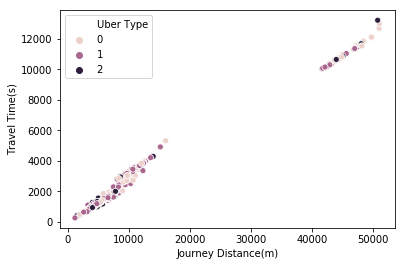

In [109]:
sns.scatterplot(x = 'Journey Distance(m)', y = 'Travel Time(s)', hue = 'Uber Type', data = data_dirty)

That's a pretty strong correlation between the two! Looks like either of **Journey Distance(m)** or **Travel Time(s)** won't be making it to our model. But which one will it be? Let's drop **Travel Time(s)**.

In [110]:
data_dirty = data_dirty[['Uber Type', 'Journey Distance(m)', 'Weekend OR Weekday', 'Morning', 'Afternoon', 'Night', 'Fare$']]

The data in our data_dirty dataframe has been refined to contain only the **relevant predictors** which will be used for model building.

In [111]:
Lin_Reg_0 = LinearRegression()
Lin_Reg_1 = LinearRegression()
Lin_Reg_2 = LinearRegression()

Since there are **three Uber Types**, there will be **three Linear Regression instances**.

In [112]:
data_dirty_Uber_Type_0 = data_dirty[data_dirty['Uber Type'] == 0]
data_dirty_Uber_Type_1 = data_dirty[data_dirty['Uber Type'] == 1]
data_dirty_Uber_Type_2 = data_dirty[data_dirty['Uber Type'] == 2]

The data has been divided into three different dataframes based on the **Uber Type** column. We can now **fit** the data to our dataframes and prepare them for prediction.

In [113]:
Lin_Reg_0.fit(data_dirty_Uber_Type_0[['Uber Type', 'Journey Distance(m)', 'Weekend OR Weekday', 'Morning', 'Afternoon', 'Night']], data_dirty_Uber_Type_0['Fare$'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [114]:
Lin_Reg_1.fit(data_dirty_Uber_Type_0[['Uber Type', 'Journey Distance(m)', 'Weekend OR Weekday', 'Morning', 'Afternoon', 'Night']], data_dirty_Uber_Type_0['Fare$'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [115]:
Lin_Reg_2.fit(data_dirty_Uber_Type_2[['Uber Type', 'Journey Distance(m)', 'Weekend OR Weekday', 'Morning', 'Afternoon', 'Night']], data_dirty_Uber_Type_2['Fare$'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Before going for the actual prediction, let's **split** our data_dirty dataframe for various Uber Types as **training** sets and compute the score on the **test** sets.

In [116]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(data_dirty_Uber_Type_0.iloc[:,:-1],data_dirty_Uber_Type_0.iloc[:,-1:], random_state = 1, test_size = 0.2 ,train_size = 0.8)
map(pd.np.shape,[X_train_0, X_test_0, y_train_0, y_test_0])

In [117]:
Lin_Reg_Full_0 = LinearRegression()
Lin_Reg_Full_0.fit(X_train_0,y_train_0)
print ('r-squared for Uber Type 0 model = ', Lin_Reg_Full_0.score(X_test_0,y_test_0))

r-squared for Uber Type 0 model =  0.9809830130246582


Wow! An unreal r-squared value of **0.981** for **Uber Type 0**. Let's see if this follows for the other two Uber Types.

In [118]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data_dirty_Uber_Type_1.iloc[:,:-1],data_dirty_Uber_Type_1.iloc[:,-1:], random_state = 1, test_size = 0.2 ,train_size = 0.8)
map(pd.np.shape,[X_train_1, X_test_1, y_train_1, y_test_1])

In [119]:
Lin_Reg_Full_1 = LinearRegression()
Lin_Reg_Full_1.fit(X_train_1,y_train_1)
print ('r-squared for Uber Type 1 model = ', Lin_Reg_Full_1.score(X_test_1,y_test_1))

r-squared for Uber Type 1 model =  0.9808202338926897


Same old same old! Uber Type 1 also has a very high r-squared value of **0.98**! Moving on to Uber Type 2 now.

In [120]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data_dirty_Uber_Type_2.iloc[:,:-1],data_dirty_Uber_Type_2.iloc[:,-1:], random_state = 1, test_size = 0.2 ,train_size = 0.8)
map(pd.np.shape,[X_train_2, X_test_2, y_train_2, y_test_2])

In [121]:
Lin_Reg_Full_2 = LinearRegression()
Lin_Reg_Full_2.fit(X_train_2,y_train_2)
print ('r-squared for Uber Type 2 model = ', Lin_Reg_Full_2.score(X_test_2,y_test_2))

r-squared for Uber Type 2 model =  0.8567448178132775


r-squared value of **0.856**! 

An average r-squared value of **0.936** which is some feat in itself! Be right back, going to apply for a Data Analyst internship at Uber for the summer!

In [122]:
data_missing_impute = data_missing[['Uber Type', 'Journey Distance(m)', 'Weekend OR Weekday', 'Morning', 'Afternoon', 'Night', 'Fare$']].copy()

In [123]:
data_missing['Fare$'][(data_missing['Fare$'].isnull()) & (data_missing['Uber Type'] == 2)] = Lin_Reg_2.predict(data_missing_impute.drop(['Fare$'], axis = 1))

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [124]:
data_missing['Fare$'][(data_missing['Fare$'].isnull()) & (data_missing['Uber Type'] == 1)] = Lin_Reg_1.predict(data_missing_impute.drop(['Fare$'], axis = 1))

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [125]:
data_missing['Fare$'][(data_missing['Fare$'].isnull()) & (data_missing['Uber Type'] == 0)] = Lin_Reg_0.predict(data_missing_impute.drop(['Fare$'], axis = 1))

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [126]:
data_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 19 columns):
UberID                   98 non-null object
Uber Type                98 non-null float64
Origin Region            98 non-null int64
Destination Region       98 non-null int64
Origin Latitude          98 non-null float64
Origin Longitude         98 non-null float64
Destination Latitude     98 non-null float64
Destination Longitude    98 non-null float64
Journey Distance(m)      98 non-null int64
Departure Date           98 non-null object
Departure Time           98 non-null object
Travel Time(s)           98 non-null float64
Arrival Time             98 non-null object
Fare$                    98 non-null float64
Weekend OR Weekday       98 non-null int64
Time Slot                98 non-null int64
Morning                  98 non-null uint8
Afternoon                98 non-null uint8
Night                    98 non-null uint8
dtypes: float64(7), int64(5), object(4), uint8(3)
memory usage

In [127]:
data_missing = data_missing.drop(['Weekend OR Weekday', 'Time Slot', 'Morning', 'Afternoon', 'Night'], axis = 1)

In [128]:
data_missing.to_csv('30046572.missing_value_solution.csv', index = False)

## Fixing Outliers

Real world data is not perfect. Infact, you'll hardly ever come across data which does not have any **dirty**, **missing** or **corrupted** values. 

## Importing Libraries

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import calendar
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Importing the **missing data file** where Uber Type is imported. Also importing **dirty data solution file** and the **Outliers** file.

In [130]:
data_missing = pd.read_csv('30046572_missing_data_uber_type_imputed.csv')

In [131]:
data_dirty = pd.read_csv('30046572_data_dirty_solution.csv')

In [132]:
data_outlier = pd.read_csv('30046572_outliers.csv')

In order to train our model, we will drop the **null** value rows for Fare in our missing data file.

In [133]:
data_missing = data_missing.dropna()

In [134]:
data_missing = data_missing.reset_index()

## Tranforming Dirty Data Template

Similar to how we transformed the dirty data in Task 2, we will transform it in Task 3. We are doing this in order to get the same **prediction score** we got above.

Again, these are **exactly the same steps we performed above in Task 2 for dirty data**.

In [135]:
for i in range(0, len(data_dirty)):
    data_dirty['Departure Date'][i] = datetime.datetime.strptime(data_dirty['Departure Date'][i], '%Y-%m-%d').strftime('%m/%d/%Y')

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [136]:
weekday_dirty = []
for i in range(0, len(data_dirty)):
    weekday_dirty.append(datetime.datetime.strptime(data_dirty['Departure Date'][i], '%m/%d/%Y').weekday())

In [137]:
weekday_end_dirty = []
for day in weekday_dirty:
    if ((day == 5) | (day == 6)):
        weekday_end_dirty.append(1)
    else:
        weekday_end_dirty.append(0)

In [138]:
weekday_end_dirty = pd.DataFrame(weekday_end_dirty)
weekday_end_dirty.columns = ['Weekend OR Weekday']
data_dirty = pd.concat([data_dirty.reset_index(drop = True), weekday_end_dirty], axis = 1)

In [139]:
time_of_day_dirty = []
for time in range(0, len(data_dirty)):
    string = re.split(':', data_dirty['Departure Time'][time])
    time_of_day_dirty.append(int(string[0]))

In [140]:
day_slot_dirty = []
for time in time_of_day_dirty:
    if  6 <= time < 12:
        day_slot_dirty.append(0)
    elif 12 <= time < 21:
        day_slot_dirty.append(1)
    else:
        day_slot_dirty.append(2)

In [141]:
slot_of_day_dirty = pd.DataFrame(day_slot_dirty)
slot_of_day_dirty.columns = ['Time Slot']
data_dirty = pd.concat([data_dirty.reset_index(drop = True), slot_of_day_dirty], axis = 1)

In [142]:
time_dummies_dirty = pd.get_dummies(data_dirty['Time Slot'])
time_dummies_dirty.columns = ['Morning', 'Afternoon', 'Night']

In [143]:
data_dirty = pd.concat([data_dirty.reset_index(drop = True), time_dummies_dirty], axis = 1)
data_dirty.head()

,UberID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Weekend OR Weekday,Time Slot,Morning,Afternoon,Night
0,ID5230402179,2,2,7,-37.822570,144.952745,-37.861835,144.905716,8472.0,01/02/2018,03:17:35,2885.10,04:05:40,230.62,0,2,0,0,1
1,ID1677847535,0,7,6,-37.861835,144.905716,-37.773803,144.983647,16033.0,07/07/2018,01:53:07,5320.68,03:21:47,23.52,1,2,0,0,1
2,ID3457854587,1,4,1,-37.802078,144.988562,-37.815655,144.963956,3307.0,01/10/2018,00:16:13,861.24,00:30:34,18.87,0,2,0,0,1
3,ID3328177715,1,3,4,-37.824991,144.982047,-37.808765,144.996189,2852.0,04/20/2018,01:51:33,678.54,02:02:51,19.72,0,2,0,0,1
4,ID1261900839,0,9,6,-38.110916,144.654173,-37.787442,144.980409,47035.0,03/28/2018,06:07:21,11413.26,09:17:34,21.36,0,0,1,0,0


## Transforming Missing Data Template

Exactly the same steps we did in Task 2 for transforming the missing data. Hence, there is no need for any explaination here.

In [144]:
weekday_missing = []
for i in range(0, len(data_missing)):
    weekday_missing.append(datetime.datetime.strptime(data_missing['Departure Date'][i], '%m/%d/%Y').weekday())

In [145]:
weekday_end_missing = []
for day in weekday_missing:
    if ((day == 5) | (day == 6)):
        weekday_end_missing.append(1)
    else:
        weekday_end_missing.append(0)

In [146]:
weekday_end_missing = pd.DataFrame(weekday_end_missing)
weekday_end_missing.columns = ['Weekend OR Weekday']
data_missing = pd.concat([data_missing.reset_index(drop = True), weekday_end_missing], axis = 1)

In [147]:
time_of_day_missing = []
for time in range(0, len(data_missing)):
    string = re.split(':', data_missing['Departure Time'][time])
    time_of_day_missing.append(int(string[0]))

In [148]:
day_slot_missing = []
for time in time_of_day_missing:
    if  6 <= time < 12:
        day_slot_missing.append(0)
    elif 12 <= time < 21:
        day_slot_missing.append(1)
    else:
        day_slot_missing.append(2)

In [149]:
slot_of_day_missing = pd.DataFrame(day_slot_missing)
slot_of_day_missing.columns = ['Time Slot']
data_missing = pd.concat([data_missing.reset_index(drop = True), slot_of_day_missing], axis = 1)

In [150]:
time_dummies_missing = pd.get_dummies(data_missing['Time Slot'])
time_dummies_missing.columns = ['Morning', 'Afternoon', 'Night']

In [151]:
data_missing = pd.concat([data_missing.reset_index(drop = True), time_dummies_missing], axis = 1)
data_missing.head()

,index,UberID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Weekend OR Weekday,Time Slot,Morning,Afternoon,Night
0,0,ID1282360365,0.0,6,1,-37.773803,144.983647,-37.806188,144.944348,9060,5/26/2018,17:01:36,2808.72,17:48:24,16.23,1,1,0,1,0
1,1,ID3370237539,1.0,4,2,-37.803109,145.003454,-37.815175,144.927539,8513,3/19/2018,5:58:42,2188.86,6:35:10,23.56,0,2,0,0,1
2,2,ID3245608941,1.0,9,7,-38.110916,144.654173,-37.861835,144.905716,50797,5/20/2018,9:55:59,13204.98,13:36:03,69.20,1,0,1,0,0
3,3,ID5513355678,2.0,2,7,-37.813594,144.937422,-37.861835,144.905716,10509,5/25/2018,0:57:53,3424.44,1:54:57,270.29,0,2,0,0,1
4,4,ID3275882509,1.0,6,9,-37.787442,144.980409,-38.110916,144.654173,47035,2/2/2018,7:05:21,11407.86,10:15:28,58.69,0,0,1,0,0


## Transforming Outliers Data Template

Same **computations/transformations** we did for missing and dirty data needs to be run on **outliers** dataset as well.

In [152]:
data_outlier.columns = ['index', 'UberID', 'Uber Type', 'Origin Region', 'Destination Region',
       'Origin Latitude', 'Origin Longitude', 'Destination Latitude',
       'Destination Longitude', 'Journey Distance(m)', 'Departure Date',
       'Departure Time', 'Travel Time(s)', 'Arrival Time', 'Fare$']

In [153]:
for i in range(0, len(data_outlier)):
    data_outlier['Departure Date'][i] = datetime.datetime.strptime(data_outlier['Departure Date'][i], '%Y-%m-%d').strftime('%m/%d/%Y')

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [154]:
weekday_outlier = []
for i in range(0, len(data_outlier)):
    weekday_outlier.append(datetime.datetime.strptime(data_outlier['Departure Date'][i], '%m/%d/%Y').weekday())

In [155]:
weekday_end_outlier = []
for day in weekday_outlier:
    if ((day == 5) | (day == 6)):
        weekday_end_outlier.append(1)
    else:
        weekday_end_outlier.append(0)

In [156]:
weekday_end_outlier = pd.DataFrame(weekday_end_outlier)
weekday_end_outlier.columns = ['Weekend OR Weekday']
data_outlier = pd.concat([data_outlier.reset_index(drop = True), weekday_end_outlier], axis = 1)

In [157]:
time_of_day_outlier = []
for time in range(0, len(data_outlier)):
    string = re.split(':', data_outlier['Departure Time'][time])
    time_of_day_outlier.append(int(string[0]))

In [158]:
day_slot_outlier = []
for time in time_of_day_outlier:
    if  6 <= time < 12:
        day_slot_outlier.append(0)
    elif 12 <= time < 21:
        day_slot_outlier.append(1)
    else:
        day_slot_outlier.append(2)

In [159]:
slot_of_day_outlier = pd.DataFrame(day_slot_outlier)
slot_of_day_outlier.columns = ['Time Slot']
data_outlier = pd.concat([data_outlier.reset_index(drop = True), slot_of_day_outlier], axis = 1)

In [160]:
time_dummies_outlier = pd.get_dummies(data_outlier['Time Slot'])
time_dummies_outlier.columns = ['Morning', 'Afternoon', 'Night']

In [161]:
data_outlier = pd.concat([data_outlier.reset_index(drop = True), time_dummies_outlier], axis = 1)
data_outlier.head()

,index,UberID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Weekend OR Weekday,Time Slot,Morning,Afternoon,Night
0,0,ID3246297287,1,5,7,-37.808659,144.925928,-37.861835,144.905716,11443.0,04/11/2018,23:15:52,3708.30,0:17:40,31.40,0,2,0,0,1
1,1,ID1615766004,0,4,7,-37.800062,145.005235,-37.861835,144.905716,12425.0,07/11/2018,17:25:29,3978.12,18:31:47,12.19,0,1,0,1,0
2,2,ID1375132735,0,3,9,-37.817510,144.995805,-38.110916,144.654173,46466.0,04/10/2018,04:24:48,11267.22,7:32:35,27.35,0,2,0,0,1
3,3,ID1295185118,0,1,7,-37.821013,144.947259,-37.861835,144.905716,9006.0,01/12/2018,17:26:10,3050.10,18:17:00,11.21,0,1,0,1,0
4,4,ID3992147845,1,7,5,-37.861835,144.905716,-37.796680,144.935370,13257.0,04/27/2018,18:38:26,4175.94,19:48:01,27.41,0,1,0,1,0


## Merging Dirty and Missing Data

We will have to merge the **dirty** and **missing** data to obtain a **training set**. 

In [162]:
data_dirty_missing = data_dirty.append(data_missing, ignore_index = True, sort = False)

In [163]:
data_dirty_missing.head()

,UberID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Weekend OR Weekday,Time Slot,Morning,Afternoon,Night,index
0,ID5230402179,2.0,2,7,-37.822570,144.952745,-37.861835,144.905716,8472.0,01/02/2018,03:17:35,2885.10,04:05:40,230.62,0,2,0,0,1,NaN
1,ID1677847535,0.0,7,6,-37.861835,144.905716,-37.773803,144.983647,16033.0,07/07/2018,01:53:07,5320.68,03:21:47,23.52,1,2,0,0,1,NaN
2,ID3457854587,1.0,4,1,-37.802078,144.988562,-37.815655,144.963956,3307.0,01/10/2018,00:16:13,861.24,00:30:34,18.87,0,2,0,0,1,NaN
3,ID3328177715,1.0,3,4,-37.824991,144.982047,-37.808765,144.996189,2852.0,04/20/2018,01:51:33,678.54,02:02:51,19.72,0,2,0,0,1,NaN
4,ID1261900839,0.0,9,6,-38.110916,144.654173,-37.787442,144.980409,47035.0,03/28/2018,06:07:21,11413.26,09:17:34,21.36,0,0,1,0,0,NaN


We will copy the **data_outlier** file into a new dataframe named **data_outlier_impute** so that we can predict on it and impute the values in the **data_outlier** file.

In [164]:
data_outlier_impute = data_outlier[['Uber Type', 'Journey Distance(m)', 'Weekend OR Weekday', 'Morning', 'Afternoon', 'Night', 'Fare$']].copy()

In [165]:
data_dirty_missing_Uber_Type_0 = data_dirty_missing[data_dirty_missing['Uber Type'] == 0]
data_dirty_missing_Uber_Type_1 = data_dirty_missing[data_dirty_missing['Uber Type'] == 1]
data_dirty_missing_Uber_Type_2 = data_dirty_missing[data_dirty_missing['Uber Type'] == 2]

In [166]:
Lin_Reg_0 = LinearRegression()
Lin_Reg_1 = LinearRegression()
Lin_Reg_2 = LinearRegression()

In [167]:
Lin_Reg_0.fit(data_dirty_missing_Uber_Type_0[['Uber Type', 'Journey Distance(m)', 'Weekend OR Weekday', 'Morning', 'Afternoon', 'Night']], data_dirty_missing_Uber_Type_0['Fare$'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [168]:
Lin_Reg_1.fit(data_dirty_missing_Uber_Type_1[['Uber Type', 'Journey Distance(m)', 'Weekend OR Weekday', 'Morning', 'Afternoon', 'Night']], data_dirty_missing_Uber_Type_1['Fare$'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [169]:
Lin_Reg_2.fit(data_dirty_missing_Uber_Type_2[['Uber Type', 'Journey Distance(m)', 'Weekend OR Weekday', 'Morning', 'Afternoon', 'Night']], data_dirty_missing_Uber_Type_2['Fare$'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [170]:
data_dirty_missing_impute = data_dirty_missing[['Uber Type', 'Journey Distance(m)', 'Weekend OR Weekday', 'Morning', 'Afternoon', 'Night', 'Fare$']].copy()

All the models have been fit! Let us now make another column named **Predicted Fare** and predict on it.

In [171]:
data_dirty_missing['Predicted Fare$'] = np.nan

## Prediction on Training Data

In order to obtain **residuals**, let us now predict and find the difference in the predictions!

In [172]:
data_dirty_missing['Predicted Fare$'][(data_dirty_missing['Predicted Fare$'].isnull()) & (data_dirty_missing['Uber Type'] == 2)] = Lin_Reg_2.predict(data_dirty_missing_impute.drop(['Fare$'], axis = 1))

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [173]:
data_dirty_missing['Predicted Fare$'][(data_dirty_missing['Predicted Fare$'].isnull()) & (data_dirty_missing['Uber Type'] == 1)] = Lin_Reg_1.predict(data_dirty_missing_impute.drop(['Fare$'], axis = 1))

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [174]:
data_dirty_missing['Predicted Fare$'][(data_dirty_missing['Predicted Fare$'].isnull()) & (data_dirty_missing['Uber Type'] == 0)] = Lin_Reg_0.predict(data_dirty_missing_impute.drop(['Fare$'], axis = 1))

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


We have the predictions now, we need to make another column **Residual** in order to find the difference between our **original fare and predicted fare**.

In [175]:
data_dirty_missing['Residual'] = data_dirty_missing['Fare$'] - data_dirty_missing['Predicted Fare$']

Converting the residuals into an absolute value so that it gives us only the **magnitude of the error**. 

In [176]:
data_dirty_missing['Residual'] = np.abs(data_dirty_missing['Residual'])

In order to find the outliers, we will making use of the following logic :

- Calculate the **means** and **standard deviations** of the **residuals** of **each Uber Type**.
- Compute the **lower** and **upper** limit by adding and subtracting the **mean** with **3 times the standard deviation**.
- With the computed **range**, we will see if the **residuals** of the **outlier** data lie within it. If not, it is clearly an **outlier**.

In [177]:
mean_uber_type_0 = np.mean(data_dirty_missing['Residual'][data_dirty_missing['Uber Type'] == 0])
mean_uber_type_1 = np.mean(data_dirty_missing['Residual'][data_dirty_missing['Uber Type'] == 1])
mean_uber_type_2 = np.mean(data_dirty_missing['Residual'][data_dirty_missing['Uber Type'] == 2])

In [178]:
std_uber_type_0 = np.std(data_dirty_missing['Residual'][data_dirty_missing['Uber Type'] == 0])
std_uber_type_1 = np.std(data_dirty_missing['Residual'][data_dirty_missing['Uber Type'] == 1])
std_uber_type_2 = np.std(data_dirty_missing['Residual'][data_dirty_missing['Uber Type'] == 2])

In [179]:
lower_limit_uber_type_0 = mean_uber_type_0 - (3*std_uber_type_0)
lower_limit_uber_type_1 = mean_uber_type_1 - (3*std_uber_type_1)
lower_limit_uber_type_2 = mean_uber_type_2 - (3*std_uber_type_2)

In [180]:
upper_limit_uber_type_0 = mean_uber_type_0 + (3*std_uber_type_0)
upper_limit_uber_type_1 = mean_uber_type_1 + (3*std_uber_type_1)
upper_limit_uber_type_2 = mean_uber_type_2 + (3*std_uber_type_2)

In [181]:
data_outlier['Predicted Fare$'] = np.nan

In [182]:
data_outlier.head()

,index,UberID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),...,Departure Time,Travel Time(s),Arrival Time,Fare$,Weekend OR Weekday,Time Slot,Morning,Afternoon,Night,Predicted Fare$
0,0,ID3246297287,1,5,7,-37.808659,144.925928,-37.861835,144.905716,11443.0,...,23:15:52,3708.30,0:17:40,31.40,0,2,0,0,1,NaN
1,1,ID1615766004,0,4,7,-37.800062,145.005235,-37.861835,144.905716,12425.0,...,17:25:29,3978.12,18:31:47,12.19,0,1,0,1,0,NaN
2,2,ID1375132735,0,3,9,-37.817510,144.995805,-38.110916,144.654173,46466.0,...,04:24:48,11267.22,7:32:35,27.35,0,2,0,0,1,NaN
3,3,ID1295185118,0,1,7,-37.821013,144.947259,-37.861835,144.905716,9006.0,...,17:26:10,3050.10,18:17:00,11.21,0,1,0,1,0,NaN
4,4,ID3992147845,1,7,5,-37.861835,144.905716,-37.796680,144.935370,13257.0,...,18:38:26,4175.94,19:48:01,27.41,0,1,0,1,0,NaN


Just like our merged dataframe, we have to calculate **residuals** for the **outliers** dataframe as well.

In [183]:
data_outlier['Predicted Fare$'][(data_outlier['Predicted Fare$'].isnull()) & (data_outlier['Uber Type'] == 2)] = Lin_Reg_2.predict(data_outlier_impute.drop(['Fare$'], axis = 1))

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [184]:
data_outlier['Predicted Fare$'][(data_outlier['Predicted Fare$'].isnull()) & (data_outlier['Uber Type'] == 1)] = Lin_Reg_1.predict(data_outlier_impute.drop(['Fare$'], axis = 1))

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [185]:
data_outlier['Predicted Fare$'][(data_outlier['Predicted Fare$'].isnull()) & (data_outlier['Uber Type'] == 0)] = Lin_Reg_0.predict(data_outlier_impute.drop(['Fare$'], axis = 1))

C:\Users\shiiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [186]:
data_outlier['Residual'] = data_outlier['Fare$'] - data_outlier['Predicted Fare$']

In [187]:
data_outlier.head()

,index,UberID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),...,Travel Time(s),Arrival Time,Fare$,Weekend OR Weekday,Time Slot,Morning,Afternoon,Night,Predicted Fare$,Residual
0,0,ID3246297287,1,5,7,-37.808659,144.925928,-37.861835,144.905716,11443.0,...,3708.30,0:17:40,31.40,0,2,0,0,1,27.603858,3.796142
1,1,ID1615766004,0,4,7,-37.800062,145.005235,-37.861835,144.905716,12425.0,...,3978.12,18:31:47,12.19,0,1,0,1,0,11.905546,0.284454
2,2,ID1375132735,0,3,9,-37.817510,144.995805,-38.110916,144.654173,46466.0,...,11267.22,7:32:35,27.35,0,2,0,0,1,27.881769,-0.531769
3,3,ID1295185118,0,1,7,-37.821013,144.947259,-37.861835,144.905716,9006.0,...,3050.10,18:17:00,11.21,0,1,0,1,0,10.656472,0.553528
4,4,ID3992147845,1,7,5,-37.861835,144.905716,-37.796680,144.935370,13257.0,...,4175.94,19:48:01,27.41,0,1,0,1,0,23.773926,3.636074


Converting the residuals in to the **absolute values**.

In [188]:
data_outlier['Residual'] = np.abs(data_outlier['Residual'])
data_outlier.head()

,index,UberID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),...,Travel Time(s),Arrival Time,Fare$,Weekend OR Weekday,Time Slot,Morning,Afternoon,Night,Predicted Fare$,Residual
0,0,ID3246297287,1,5,7,-37.808659,144.925928,-37.861835,144.905716,11443.0,...,3708.30,0:17:40,31.40,0,2,0,0,1,27.603858,3.796142
1,1,ID1615766004,0,4,7,-37.800062,145.005235,-37.861835,144.905716,12425.0,...,3978.12,18:31:47,12.19,0,1,0,1,0,11.905546,0.284454
2,2,ID1375132735,0,3,9,-37.817510,144.995805,-38.110916,144.654173,46466.0,...,11267.22,7:32:35,27.35,0,2,0,0,1,27.881769,0.531769
3,3,ID1295185118,0,1,7,-37.821013,144.947259,-37.861835,144.905716,9006.0,...,3050.10,18:17:00,11.21,0,1,0,1,0,10.656472,0.553528
4,4,ID3992147845,1,7,5,-37.861835,144.905716,-37.796680,144.935370,13257.0,...,4175.94,19:48:01,27.41,0,1,0,1,0,23.773926,3.636074


Let us explore the residuals to get the feel of it. This might give us a hint on how many outliers to expect.

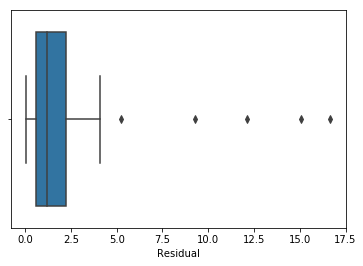

In [189]:
sns.boxplot(data_outlier['Residual'][data_outlier['Uber Type'] == 0])

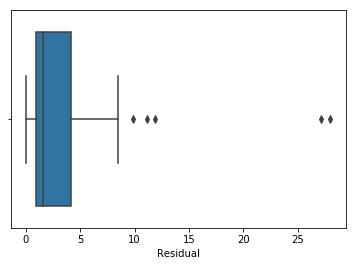

In [190]:
sns.boxplot(data_outlier['Residual'][data_outlier['Uber Type'] == 1])

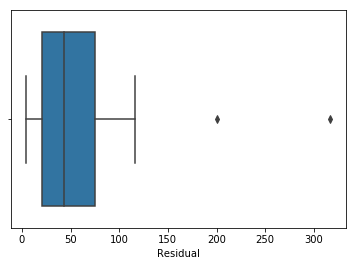

In [191]:
sns.boxplot(data_outlier['Residual'][data_outlier['Uber Type'] == 2])

We can expect to have around **12-20 outliers** in our data.

Let us print out the **UberID's** and **Residual** values so that we can remove them one by one.

In [192]:
for i in data_outlier.index:
    if data_outlier['Uber Type'][i] == 0:
        if ((data_outlier['Residual'][i] < lower_limit_uber_type_0) | (data_outlier['Residual'][i] > upper_limit_uber_type_0)):
            print(str(data_outlier['UberID'][i]) + " : " + str(data_outlier['Residual'][i]))

ID1553355020 : 12.132145179023663
ID1210275147 : 5.230266824260152
ID1918413367 : 16.667222697072134
ID1867717908 : 15.045268158993288
ID1991702337 : 9.293427936477887
ID1646116843 : 4.112301480830048


Great! **Uber Type 0** has **6 outliers**.

In [193]:
for i in data_outlier.index:
    if data_outlier['Uber Type'][i] == 1:
        if ((data_outlier['Residual'][i] < lower_limit_uber_type_1) | (data_outlier['Residual'][i] > upper_limit_uber_type_1)):
            print(str(data_outlier['UberID'][i]) + " : " + str(data_outlier['Residual'][i]))

ID3842049294 : 8.438268191161534
ID3948338483 : 9.833322165123713
ID3564714188 : 11.890654641562868
ID3343119976 : 27.151452605381664
ID3743025813 : 11.122951743880034
ID3627238291 : 27.990654603063646


**Uber Type 1** also has **6 outliers**.

In [194]:
for i in data_outlier.index:
    if data_outlier['Uber Type'][i] == 2:
        if ((data_outlier['Residual'][i] < lower_limit_uber_type_2) | (data_outlier['Residual'][i] > upper_limit_uber_type_2)):
            print(str(data_outlier['UberID'][i]) + " : " + str(data_outlier['Residual'][i]))

ID5632917673 : 316.9339951793668
ID5229311605 : 62.182313316113195
ID5655247457 : 200.74929930766496
ID5994777809 : 115.9491869143697


**Uber Type 2** has **4 outliers**. So, there are a total of **16 outliers** in our data that we were able to identify. Time to remove them now.

**Removing outliers for Uber Type 0**

In [195]:
data_outlier = data_outlier.drop(data_outlier[data_outlier['UberID'] == 'ID1553355020'].index)
data_outlier = data_outlier.drop(data_outlier[data_outlier['UberID'] == 'ID1210275147'].index)
data_outlier = data_outlier.drop(data_outlier[data_outlier['UberID'] == 'ID1918413367'].index)
data_outlier = data_outlier.drop(data_outlier[data_outlier['UberID'] == 'ID1867717908'].index)
data_outlier = data_outlier.drop(data_outlier[data_outlier['UberID'] == 'ID1991702337'].index)
data_outlier = data_outlier.drop(data_outlier[data_outlier['UberID'] == 'ID1646116843'].index)

**Removing outliers for Uber Type 1**

In [196]:
data_outlier = data_outlier.drop(data_outlier[data_outlier['UberID'] == 'ID3842049294'].index)
data_outlier = data_outlier.drop(data_outlier[data_outlier['UberID'] == 'ID3948338483'].index)
data_outlier = data_outlier.drop(data_outlier[data_outlier['UberID'] == 'ID3564714188'].index)
data_outlier = data_outlier.drop(data_outlier[data_outlier['UberID'] == 'ID3343119976'].index)
data_outlier = data_outlier.drop(data_outlier[data_outlier['UberID'] == 'ID3743025813'].index)
data_outlier = data_outlier.drop(data_outlier[data_outlier['UberID'] == 'ID3627238291'].index)

**Removing outliers for Uber Type 2**

In [197]:
data_outlier = data_outlier.drop(data_outlier[data_outlier['UberID'] == 'ID5632917673'].index)
data_outlier = data_outlier.drop(data_outlier[data_outlier['UberID'] == 'ID5229311605'].index)
data_outlier = data_outlier.drop(data_outlier[data_outlier['UberID'] == 'ID5655247457'].index)
data_outlier = data_outlier.drop(data_outlier[data_outlier['UberID'] == 'ID5994777809'].index)

In [198]:
print(len(data_outlier))

95


All outliers have been removed. Time to write the file!

In [199]:
data_outlier.drop(labels=['Weekend OR Weekday','Time Slot','Morning','Afternoon','Night','Predicted Fare$','Residual'], axis=1, inplace=True)

In [200]:
data_outlier.to_csv('30046572_outliers_solution.csv', index = False)